In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
# general overview

PAU_FG= pd.read_excel("./data/Mitjanes.xlsx", sheet_name= "Notes mitjanes PAU FG", usecols= "B:H", skiprows= [1,2,3,4,5,6,7,8,9])
PAU_FE= pd.read_excel("./data/Mitjanes.xlsx", sheet_name= "Notes mitjanes PAU FE", usecols= "B:H", skiprows= [1,2,3,4,5,6,7,8,9])


In [3]:
PAU_FG

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Alt Pirineu i Aran,37875315,Públic,5.517,5.672,6.715,6.494
1,Alt Pirineu i Aran,55689276,Públic,7.048,6.419,7.406,7.360
2,Alt Pirineu i Aran,55693082,Públic,6.017,5.899,6.402,5.839
3,Alt Pirineu i Aran,55693083,Públic,7.155,6.900,6.248,7.691
4,Alt Pirineu i Aran,55693131,Públic,6.621,6.786,6.866,6.877
...,...,...,...,...,...,...,...
740,Vallès Occidental,17976421,Públic,6.851,6.781,6.709,6.405
741,Vallès Occidental,17979279,Públic,5.633,5.959,5.593,6.008
742,Vallès Occidental,17984056,Privat,5.383,5.350,5.500,5.200
743,Vallès Occidental,17987049,Privat,7.514,7.733,6.813,6.633


In [4]:
PAU_FG.rename(columns={"Unnamed: 1":"SERVEI_TERRITORIAL",
              "Unnamed: 2":"Codi Anònim",
              "Unnamed: 3":"TIPUS_CENTRE_ESTUDI",
              "Unnamed: 4":"Curs2324",
              "Unnamed: 5":"Curs2223",
              "Unnamed: 6": "Curs2122",
              "Unnamed: 7":"Curs2021"}, inplace= True)
PAU_FG.set_index("Codi Anònim")
PAU_FG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SERVEI_TERRITORIAL   745 non-null    object 
 1   Codi Anònim          745 non-null    int64  
 2   TIPUS_CENTRE_ESTUDI  745 non-null    object 
 3   Curs2324             740 non-null    float64
 4   Curs2223             736 non-null    float64
 5   Curs2122             732 non-null    float64
 6   Curs2021             726 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 40.9+ KB


In [5]:
PAU_FG["TIPUS_CENTRE_ESTUDI"].value_counts()

TIPUS_CENTRE_ESTUDI
Públic                486
Privat                241
Terres de l'Ebre *     18
Name: count, dtype: int64

In [6]:
PAU_FG.loc[PAU_FG["Curs2324"].isna()]

,SERVEI_TERRITORIAL,Codi Anònim,TIPUS_CENTRE_ESTUDI,Curs2324,Curs2223,Curs2122,Curs2021
108,Barcelonès,17895061,Privat,NaN,5.264,4.827,5.831
272,Consorci d'Educació de Barcelona,17848015,Privat,NaN,6.690,6.189,5.229
273,Consorci d'Educació de Barcelona,17848094,Privat,NaN,NaN,6.025,NaN
288,Consorci d'Educació de Barcelona,17893374,Públic,NaN,NaN,4.867,5.000
521,Maresme - Vallès Oriental,17942322,Privat,NaN,NaN,7.753,7.808


In [7]:
PAU_FG.groupby(["SERVEI_TERRITORIAL","TIPUS_CENTRE_ESTUDI"])["Curs2324"].mean()

SERVEI_TERRITORIAL                TIPUS_CENTRE_ESTUDI
Alt Pirineu i Aran                Públic                 6.353000
Baix Llobregat                    Privat                 6.904682
                                  Públic                 6.523275
Barcelonès                        Privat                 6.553278
                                  Públic                 6.018105
Catalunya Central                 Privat                 6.770778
                                  Públic                 6.772235
Consorci d'Educació de Barcelona  Privat                 6.756570
                                  Públic                 6.333273
Girona                            Privat                 6.764692
                                  Públic                 6.649857
Lleida                            Privat                 6.802091
                                  Públic                 6.670375
Maresme - Vallès Oriental         Privat                 6.737850
                      

In [8]:
PAU_FG.groupby(["SERVEI_TERRITORIAL","TIPUS_CENTRE_ESTUDI"])["Curs2223"].mean()

SERVEI_TERRITORIAL                TIPUS_CENTRE_ESTUDI
Alt Pirineu i Aran                Públic                 6.274429
Baix Llobregat                    Privat                 6.818136
                                  Públic                 6.466627
Barcelonès                        Privat                 6.728316
                                  Públic                 6.103459
Catalunya Central                 Privat                 6.860556
                                  Públic                 6.658273
Consorci d'Educació de Barcelona  Privat                 6.764851
                                  Públic                 6.411538
Girona                            Privat                 6.845308
                                  Públic                 6.711582
Lleida                            Privat                 6.806182
                                  Públic                 6.697156
Maresme - Vallès Oriental         Privat                 6.974050
                      

In [9]:
PAU_FG.groupby(["SERVEI_TERRITORIAL","TIPUS_CENTRE_ESTUDI"])["Curs2122"].mean()

SERVEI_TERRITORIAL                TIPUS_CENTRE_ESTUDI
Alt Pirineu i Aran                Públic                 6.584000
Baix Llobregat                    Privat                 6.852273
                                  Públic                 6.574333
Barcelonès                        Privat                 6.708053
                                  Públic                 6.016943
Catalunya Central                 Privat                 6.746444
                                  Públic                 6.750781
Consorci d'Educació de Barcelona  Privat                 6.845242
                                  Públic                 6.356016
Girona                            Privat                 6.991538
                                  Públic                 6.724345
Lleida                            Privat                 7.016818
                                  Públic                 6.742563
Maresme - Vallès Oriental         Privat                 7.128550
                      

In [10]:
PAU_FG.groupby(["SERVEI_TERRITORIAL","TIPUS_CENTRE_ESTUDI"])["Curs2021"].mean()

SERVEI_TERRITORIAL                TIPUS_CENTRE_ESTUDI
Alt Pirineu i Aran                Públic                 6.649429
Baix Llobregat                    Privat                 6.961909
                                  Públic                 6.562549
Barcelonès                        Privat                 6.779632
                                  Públic                 6.125556
Catalunya Central                 Privat                 7.125750
                                  Públic                 6.589719
Consorci d'Educació de Barcelona  Privat                 6.833064
                                  Públic                 6.261524
Girona                            Privat                 7.047667
                                  Públic                 6.700327
Lleida                            Privat                 6.826091
                                  Públic                 6.859563
Maresme - Vallès Oriental         Privat                 7.143500
                      

In [11]:
Barcelones = PAU_FG["SERVEI_TERRITORIAL"] == "Barcelonès"
Barcelona = PAU_FG["SERVEI_TERRITORIAL"] == "Consorci d'Educació de Barcelona"
Maresme = PAU_FG["SERVEI_TERRITORIAL"] == "Maresme - Vallès Oriental"
Central = PAU_FG["SERVEI_TERRITORIAL"] == "Catalunya Central"
Girona= PAU_FG["SERVEI_TERRITORIAL"] == "Girona"
Tarragona	= PAU_FG["SERVEI_TERRITORIAL"] == "Tarragona"
Occidental =PAU_FG["SERVEI_TERRITORIAL"] == "Vallès Occidental"
Penedes =PAU_FG["SERVEI_TERRITORIAL"] == "Penedès"

Privado = PAU_FG["TIPUS_CENTRE_ESTUDI"] == "Privat"
Publico = PAU_FG["TIPUS_CENTRE_ESTUDI"] == "Públic"

PAU_FG_nulo = PAU_FG["Curs2324"].isna()

PAU_FG.loc[Barcelones & Privado & PAU_FG_nulo,"Curs2324" ] = float(6.553278)
PAU_FG.loc[Barcelona & Privado & PAU_FG_nulo,"Curs2324"] = float(6.756570)
PAU_FG.loc[Barcelona & Publico & PAU_FG_nulo,"Curs2324"] = float(6.333273)
PAU_FG.loc[Maresme & Privado & PAU_FG_nulo,"Curs2324"] = float(6.737850)

In [12]:
PAU_FG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SERVEI_TERRITORIAL   745 non-null    object 
 1   Codi Anònim          745 non-null    int64  
 2   TIPUS_CENTRE_ESTUDI  745 non-null    object 
 3   Curs2324             745 non-null    float64
 4   Curs2223             736 non-null    float64
 5   Curs2122             732 non-null    float64
 6   Curs2021             726 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 40.9+ KB


In [14]:
PAU_FG_nulo22 = PAU_FG["Curs2223"].isna()
PAU_FG.loc[Barcelones & Publico & PAU_FG_nulo22, "Curs2223"] = float(6.103459)
PAU_FG.loc[Central & Publico & PAU_FG_nulo22, "Curs2223"] = float(6.658273)
PAU_FG.loc[Barcelona & Publico & PAU_FG_nulo22, "Curs2223"] = float(6.411538)
PAU_FG.loc[Barcelona & Privado & PAU_FG_nulo22, "Curs2223"] = float(6.764851)
PAU_FG.loc[Girona & Publico & PAU_FG_nulo22, "Curs2223"] = float(6.711582)
PAU_FG.loc[Maresme & Privado & PAU_FG_nulo22, "Curs2223"] = float(6.974050)
PAU_FG.loc[Tarragona & Privado & PAU_FG_nulo22, "Curs2223"] = float(6.782462)
PAU_FG.loc[Occidental & Publico & PAU_FG_nulo22, "Curs2223"] = float(6.401967)

PAU_FG_nulo21 = PAU_FG["Curs2122"].isna()
PAU_FG.loc[Barcelones & Publico & PAU_FG_nulo21, "Curs2122"] = float(6.016943)
PAU_FG.loc[Central & Publico & PAU_FG_nulo21, "Curs2122"] = float(6.750781)
PAU_FG.loc[Barcelona & Publico & PAU_FG_nulo21, "Curs2122"] = float(6.356016)
PAU_FG.loc[Girona & Publico & PAU_FG_nulo21, "Curs2122"] = float(6.724345)
PAU_FG.loc[Tarragona & Privado & PAU_FG_nulo21, "Curs2122"] = float(7.095385)
PAU_FG.loc[Occidental & Publico & PAU_FG_nulo21, "Curs2122"] = float(6.422803)
PAU_FG.loc[Maresme & Privado & PAU_FG_nulo21, "Curs2122"] = float(7.128550)
PAU_FG.loc[Maresme & Publico & PAU_FG_nulo21, "Curs2122"] = float(6.560710)

PAU_FG_nulo20 = PAU_FG["Curs2021"].isna()
PAU_FG.loc[Barcelones & Publico & PAU_FG_nulo20, "Curs2021"] = float(6.261524)
PAU_FG.loc[Central & Publico & PAU_FG_nulo20, "Curs2021"] = float(6.589719)
PAU_FG.loc[Barcelona & Privado & PAU_FG_nulo20, "Curs2021"] = float(6.833064)
PAU_FG.loc[Barcelona & Publico & PAU_FG_nulo20, "Curs2021"] = float(6.261524)
PAU_FG.loc[Girona & Publico & PAU_FG_nulo20, "Curs2021"] = float(6.700327)
PAU_FG.loc[Tarragona & Privado & PAU_FG_nulo20, "Curs2021"] = float(6.829538)
PAU_FG.loc[Occidental & Publico & PAU_FG_nulo20, "Curs2021"] = float(6.422803)
PAU_FG.loc[Central & Privado & PAU_FG_nulo20, "Curs2021"] = float(7.125750)
PAU_FG.loc[Maresme & Publico & PAU_FG_nulo20, "Curs2021"] = float(6.722533)
PAU_FG.loc[Maresme & Privado & PAU_FG_nulo20, "Curs2021"] = float(7.143500)
PAU_FG.loc[Girona & Privado & PAU_FG_nulo20, "Curs2021"] = float(7.047667)
PAU_FG.loc[Penedes & Publico & PAU_FG_nulo20, "Curs2021"] = float(6.551914)

In [15]:
PAU_FG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SERVEI_TERRITORIAL   745 non-null    object 
 1   Codi Anònim          745 non-null    int64  
 2   TIPUS_CENTRE_ESTUDI  745 non-null    object 
 3   Curs2324             745 non-null    float64
 4   Curs2223             745 non-null    float64
 5   Curs2122             745 non-null    float64
 6   Curs2021             745 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 40.9+ KB


In [16]:
PAU_FG.loc[PAU_FG["Curs2021"].isna()]

,SERVEI_TERRITORIAL,Codi Anònim,TIPUS_CENTRE_ESTUDI,Curs2324,Curs2223,Curs2122,Curs2021


In [17]:
PAU_FG.nunique()
PAU_FG["Codi Anònim"].nunique()/len(PAU_FG)*100

100.0

In [18]:
PAU_FE.rename(columns={"Unnamed: 1":"SERVEI_TERRITORIAL",
              "Unnamed: 2":"Codi Anònim",
              "Unnamed: 3":"TIPUS_CENTRE_ESTUDI",
              "Unnamed: 4":"Curs2324",
              "Unnamed: 5":"Curs2223",
              "Unnamed: 6": "Curs2122",
              "Unnamed: 7":"Curs2021"}, inplace= True)
PAU_FE.set_index("Codi Anònim")

,SERVEI_TERRITORIAL,TIPUS_CENTRE_ESTUDI,Curs2324,Curs2223,Curs2122,Curs2021
Codi Anònim,,,,,,
37875315,Alt Pirineu i Aran,Públic,6.132,4.922,6.095,6.071
55689276,Alt Pirineu i Aran,Públic,6.679,6.064,6.238,6.550
55693082,Alt Pirineu i Aran,Públic,5.524,5.938,5.792,5.158
55693083,Alt Pirineu i Aran,Públic,6.250,6.972,4.883,7.167
55693131,Alt Pirineu i Aran,Públic,6.725,6.341,6.822,6.647
...,...,...,...,...,...,...
17976421,Vallès Occidental,Públic,6.566,6.735,6.524,7.200
17979279,Vallès Occidental,Públic,6.418,6.203,6.243,6.375
17984056,Vallès Occidental,Privat,3.000,4.068,5.605,4.953


In [19]:
PAU_FE.nunique()
PAU_FE["Codi Anònim"].nunique()/len(PAU_FE)*100

100.0

In [20]:
PAU_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SERVEI_TERRITORIAL   745 non-null    object 
 1   Codi Anònim          745 non-null    int64  
 2   TIPUS_CENTRE_ESTUDI  745 non-null    object 
 3   Curs2324             740 non-null    float64
 4   Curs2223             736 non-null    float64
 5   Curs2122             732 non-null    float64
 6   Curs2021             726 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 40.9+ KB


In [21]:
PAU_FE.groupby(["SERVEI_TERRITORIAL","TIPUS_CENTRE_ESTUDI"])["Curs2324"].mean()

SERVEI_TERRITORIAL                TIPUS_CENTRE_ESTUDI
Alt Pirineu i Aran                Públic                 6.131000
Baix Llobregat                    Privat                 6.481273
                                  Públic                 6.241137
Barcelonès                        Privat                 6.506722
                                  Públic                 6.089974
Catalunya Central                 Privat                 6.309444
                                  Públic                 6.379029
Consorci d'Educació de Barcelona  Privat                 6.551849
                                  Públic                 6.186894
Girona                            Privat                 6.354000
                                  Públic                 6.514607
Lleida                            Privat                 6.660455
                                  Públic                 6.331281
Maresme - Vallès Oriental         Privat                 6.396900
                      

In [22]:
PAU_FE.groupby(["SERVEI_TERRITORIAL","TIPUS_CENTRE_ESTUDI"])["Curs2223"].mean()

SERVEI_TERRITORIAL                TIPUS_CENTRE_ESTUDI
Alt Pirineu i Aran                Públic                 5.909857
Baix Llobregat                    Privat                 6.411318
                                  Públic                 6.216784
Barcelonès                        Privat                 6.441105
                                  Públic                 5.841000
Catalunya Central                 Privat                 6.370778
                                  Públic                 6.254364
Consorci d'Educació de Barcelona  Privat                 6.434755
                                  Públic                 6.122354
Girona                            Privat                 6.170615
                                  Públic                 6.216091
Lleida                            Privat                 6.360455
                                  Públic                 6.199156
Maresme - Vallès Oriental         Privat                 6.565850
                      

In [23]:
PAU_FE.groupby(["SERVEI_TERRITORIAL","TIPUS_CENTRE_ESTUDI"])["Curs2122"].mean()

SERVEI_TERRITORIAL                TIPUS_CENTRE_ESTUDI
Alt Pirineu i Aran                Públic                 5.764143
Baix Llobregat                    Privat                 6.555909
                                  Públic                 6.364961
Barcelonès                        Privat                 6.488737
                                  Públic                 6.083286
Catalunya Central                 Privat                 6.360111
                                  Públic                 6.612344
Consorci d'Educació de Barcelona  Privat                 6.641074
                                  Públic                 6.121344
Girona                            Privat                 6.629615
                                  Públic                 6.505618
Lleida                            Privat                 6.809455
                                  Públic                 6.397031
Maresme - Vallès Oriental         Privat                 6.919100
                      

In [24]:
PAU_FE.groupby(["SERVEI_TERRITORIAL","TIPUS_CENTRE_ESTUDI"])["Curs2021"].mean()

SERVEI_TERRITORIAL                TIPUS_CENTRE_ESTUDI
Alt Pirineu i Aran                Públic                 6.349286
Baix Llobregat                    Privat                 6.858455
                                  Públic                 6.596725
Barcelonès                        Privat                 6.836368
                                  Públic                 6.243861
Catalunya Central                 Privat                 6.868750
                                  Públic                 6.695312
Consorci d'Educació de Barcelona  Privat                 6.871670
                                  Públic                 6.395937
Girona                            Privat                 6.870917
                                  Públic                 6.707945
Lleida                            Privat                 6.787182
                                  Públic                 6.594000
Maresme - Vallès Oriental         Privat                 7.158950
                      

In [25]:
Barcelones = PAU_FE["SERVEI_TERRITORIAL"] == "Barcelonès"
Barcelona = PAU_FE["SERVEI_TERRITORIAL"] == "Consorci d'Educació de Barcelona"
Maresme = PAU_FE["SERVEI_TERRITORIAL"] == "Maresme - Vallès Oriental"
Central = PAU_FE["SERVEI_TERRITORIAL"] == "Catalunya Central"
Girona= PAU_FE["SERVEI_TERRITORIAL"] == "Girona"
Tarragona	= PAU_FE["SERVEI_TERRITORIAL"] == "Tarragona"
Occidental =PAU_FE["SERVEI_TERRITORIAL"] == "Vallès Occidental"
Penedes =PAU_FE["SERVEI_TERRITORIAL"] == "Penedès"

Privado = PAU_FE["TIPUS_CENTRE_ESTUDI"] == "Privat"
Publico = PAU_FE["TIPUS_CENTRE_ESTUDI"] == "Públic"

PAU_FE_nulo = PAU_FE["Curs2324"].isna()

PAU_FE.loc[Barcelones & Privado & PAU_FE_nulo,"Curs2324" ] = float(6.506722)
PAU_FE.loc[Barcelona & Privado & PAU_FE_nulo,"Curs2324"] = float(6.551849)
PAU_FE.loc[Barcelona & Publico & PAU_FE_nulo,"Curs2324"] = float(6.186894)
PAU_FE.loc[Maresme & Privado & PAU_FE_nulo,"Curs2324"] = float(6.396900)

In [26]:
PAU_FE_nulo22 = PAU_FE["Curs2223"].isna()
PAU_FE.loc[Barcelones & Publico & PAU_FE_nulo22,"Curs2223"] = float(5.841000)
PAU_FE.loc[Central & Publico & PAU_FE_nulo22,"Curs2223"] = float(6.254364)
PAU_FE.loc[Barcelona & Publico & PAU_FE_nulo22,"Curs2223"] = float(6.122354)
PAU_FE.loc[Barcelona & Privado & PAU_FE_nulo22,"Curs2223"] = float(6.434755)
PAU_FE.loc[Girona & Publico & PAU_FE_nulo22,"Curs2223"] = float(6.216091)
PAU_FE.loc[Maresme & Privado & PAU_FE_nulo22,"Curs2223"] = float(6.565850)
PAU_FE.loc[Tarragona & Privado & PAU_FE_nulo22,"Curs2223"] = float(6.430923)
PAU_FE.loc[Occidental & Publico & PAU_FE_nulo22,"Curs2223"] = float(6.220869)

PAU_FE_nulo21 = PAU_FE["Curs2122"].isna()
PAU_FE.loc[Barcelones & Publico & PAU_FE_nulo21, "Curs2122"] = float(6.083286)
PAU_FE.loc[Central & Publico & PAU_FE_nulo21, "Curs2122"] = float(6.612344)
PAU_FE.loc[Barcelona & Publico & PAU_FE_nulo21, "Curs2122"] = float(6.121344)
PAU_FE.loc[Girona & Publico & PAU_FE_nulo21, "Curs2122"] = float(6.505618)
PAU_FE.loc[Tarragona & Privado & PAU_FE_nulo21, "Curs2122"] = float(6.921692)
PAU_FE.loc[Occidental & Publico & PAU_FE_nulo21, "Curs2122"] = float(6.100607)
PAU_FE.loc[Maresme & Privado & PAU_FE_nulo21, "Curs2122"] = float(6.919100)
PAU_FE.loc[Maresme & Publico & PAU_FE_nulo21, "Curs2122"] = float(6.436935)

PAU_FE_nulo20 = PAU_FE["Curs2021"].isna()
PAU_FE.loc[Barcelones & Publico & PAU_FE_nulo20, "Curs2021"] = float(6.243861)
PAU_FE.loc[Central & Publico & PAU_FE_nulo20, "Curs2021"] = float(6.695312)
PAU_FE.loc[Barcelona & Privado & PAU_FE_nulo20, "Curs2021"] = float(6.871670)
PAU_FE.loc[Barcelona & Publico & PAU_FE_nulo20, "Curs2021"] = float(6.395937)
PAU_FE.loc[Girona & Publico & PAU_FE_nulo20, "Curs2021"] = float(6.707945)
PAU_FE.loc[Tarragona & Privado & PAU_FE_nulo20, "Curs2021"] = float(6.839385)
PAU_FE.loc[Occidental & Publico & PAU_FE_nulo20, "Curs2021"] = float(6.610541)
PAU_FE.loc[Central & Privado & PAU_FE_nulo20, "Curs2021"] = float(6.868750)
PAU_FE.loc[Maresme & Privado & PAU_FE_nulo20, "Curs2021"] = float(7.158950)
PAU_FE.loc[Maresme & Publico & PAU_FE_nulo20, "Curs2021"] = float(6.696633)
PAU_FE.loc[Girona & Privado & PAU_FE_nulo20, "Curs2021"] = float(6.870917)
PAU_FE.loc[Penedes & Publico & PAU_FE_nulo20, "Curs2021"] = float(6.619743)

In [27]:
PAU_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SERVEI_TERRITORIAL   745 non-null    object 
 1   Codi Anònim          745 non-null    int64  
 2   TIPUS_CENTRE_ESTUDI  745 non-null    object 
 3   Curs2324             745 non-null    float64
 4   Curs2223             745 non-null    float64
 5   Curs2122             745 non-null    float64
 6   Curs2021             745 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 40.9+ KB


In [28]:
# univariante
# Tabla de variantes
# Aprovechamos la funccion de los ejercicios. 
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["Tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

card_tipo(PAU_FG)

,Card,%_Card,Tipo,Tipo_sugerido,tipo_sugerido
SERVEI_TERRITORIAL,12,1.610738,object,Categorica,Numerica discreta
Codi Anònim,745,100.0,int64,Categorica,Numerica continua
TIPUS_CENTRE_ESTUDI,3,0.402685,object,Categorica,NaN
Curs2324,611,82.013423,float64,Categorica,Numerica continua
Curs2223,617,82.818792,float64,Categorica,Numerica continua
Curs2122,607,81.47651,float64,Categorica,Numerica continua
Curs2021,624,83.758389,float64,Categorica,Numerica continua


In [29]:
PAU_FG["TIPUS_CENTRE_ESTUDI"].value_counts()

TIPUS_CENTRE_ESTUDI
Públic                486
Privat                241
Terres de l'Ebre *     18
Name: count, dtype: int64

In [30]:
card_tipo(PAU_FE)

,Card,%_Card,Tipo,Tipo_sugerido,tipo_sugerido
SERVEI_TERRITORIAL,12,1.610738,object,Categorica,Numerica discreta
Codi Anònim,745,100.0,int64,Categorica,Numerica continua
TIPUS_CENTRE_ESTUDI,3,0.402685,object,Categorica,NaN
Curs2324,625,83.892617,float64,Categorica,Numerica continua
Curs2223,627,84.161074,float64,Categorica,Numerica continua
Curs2122,624,83.758389,float64,Categorica,Numerica continua
Curs2021,615,82.550336,float64,Categorica,Numerica continua


In [31]:
PAU_FE["TIPUS_CENTRE_ESTUDI"].value_counts()


TIPUS_CENTRE_ESTUDI
Públic                486
Privat                241
Terres de l'Ebre *     18
Name: count, dtype: int64

In [32]:
# Asignando al Ebre los centros publicos porque solo exite 1 que no lo sea
Ebre = PAU_FE["TIPUS_CENTRE_ESTUDI"] == "Terres de l'Ebre *"
PAU_FE.loc[Ebre , "TIPUS_CENTRE_ESTUDI"] = "Públic"


In [33]:
Ebre = PAU_FG["TIPUS_CENTRE_ESTUDI"] == "Terres de l'Ebre *"
PAU_FG.loc[Ebre , "TIPUS_CENTRE_ESTUDI"] = "Públic"

In [34]:
PAU_FE["TIPUS_CENTRE_ESTUDI"].value_counts()

TIPUS_CENTRE_ESTUDI
Públic    504
Privat    241
Name: count, dtype: int64

In [35]:
PAU_FG["TIPUS_CENTRE_ESTUDI"].value_counts()

TIPUS_CENTRE_ESTUDI
Públic    504
Privat    241
Name: count, dtype: int64

In [36]:
PAU_FG["SERVEI_TERRITORIAL"].value_counts()

SERVEI_TERRITORIAL
Consorci d'Educació de Barcelona    162
Vallès Occidental                    90
Maresme - Vallès Oriental            84
Baix Llobregat                       73
Girona                               69
Barcelonès                           57
Tarragona                            54
Penedès                              45
Lleida                               43
Catalunya Central                    43
Terres de l'Ebre                     18
Alt Pirineu i Aran                    7
Name: count, dtype: int64

Text(0, 0.5, '%')

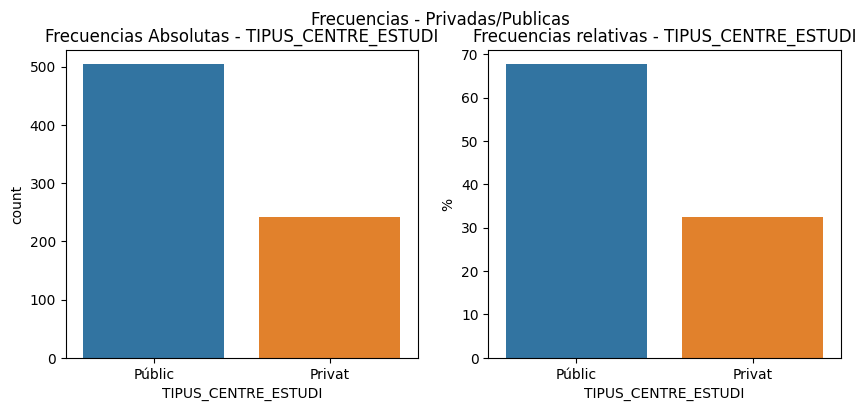

In [37]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Frecuencias - Privadas/Publicas")
sns.countplot(x="TIPUS_CENTRE_ESTUDI", data= PAU_FG, ax=axs[0], hue= "TIPUS_CENTRE_ESTUDI")
axs[0].set_title("Frecuencias Absolutas - TIPUS_CENTRE_ESTUDI")

valores = PAU_FG.TIPUS_CENTRE_ESTUDI.value_counts(normalize=True)*100
sns.barplot(x=valores.index, y= valores.values, hue= valores.index, ax = axs[1], native_scale=True);
axs[1].set_title("Frecuencias relativas - TIPUS_CENTRE_ESTUDI")
axs[1].set_ylabel("%")

In [38]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=True, mostrar_valores=True):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

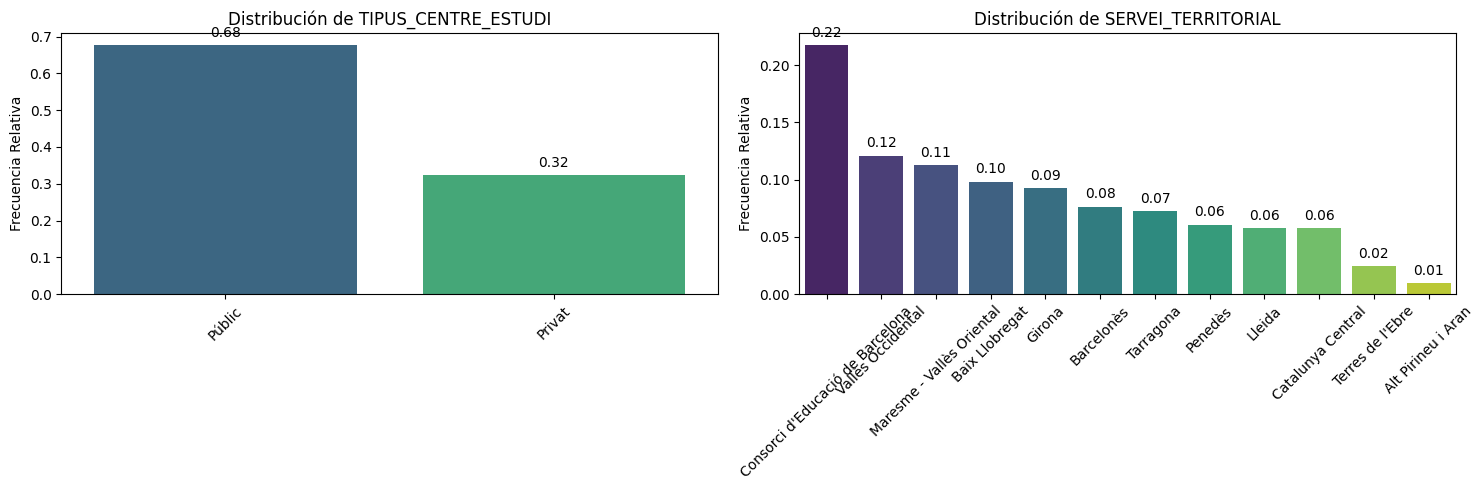

In [39]:
categorica = ["TIPUS_CENTRE_ESTUDI", "SERVEI_TERRITORIAL"]
pinta_distribucion_categoricas(PAU_FG,   categorica     )

In [40]:
PAU_FG["Curs2324"].describe()

count    745.000000
mean       6.573977
std        0.542848
min        4.317000
25%        6.275000
50%        6.634000
75%        6.925000
max        8.093000
Name: Curs2324, dtype: float64

In [41]:
# miremos las variables numericas
Numericas = ["Curs2324", "Curs2223", "Curs2122", "Curs2021"]
def get_IQR(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    print(f" IQR {col} es de {IQR}")

get_IQR(PAU_FG, "Curs2324")

 IQR Curs2324 es de 0.6499999999999995


In [42]:
def get_CV(df, columna):    
    CV = (df[columna].describe().T["std"]/df[columna].describe().T["mean"])*100
    print(f" El coeficiente de variación de {columna} es de {CV}")

get_CV(PAU_FG,"Curs2324")

 El coeficiente de variación de Curs2324 es de 8.257528342265443


In [43]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


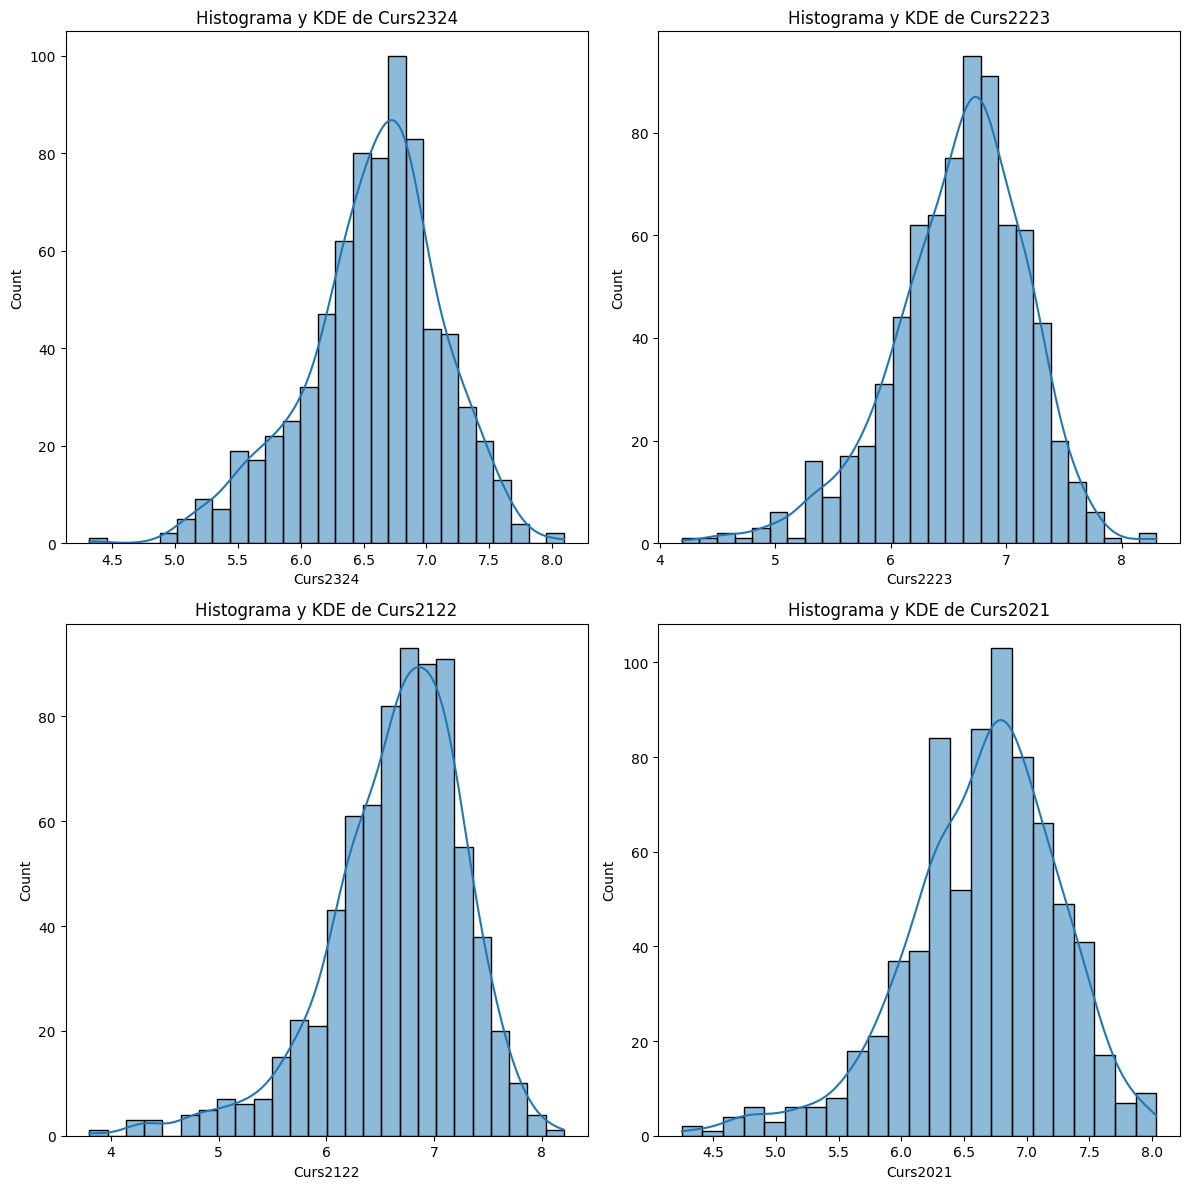

In [44]:
plot_histo_den(PAU_FG,Numericas)

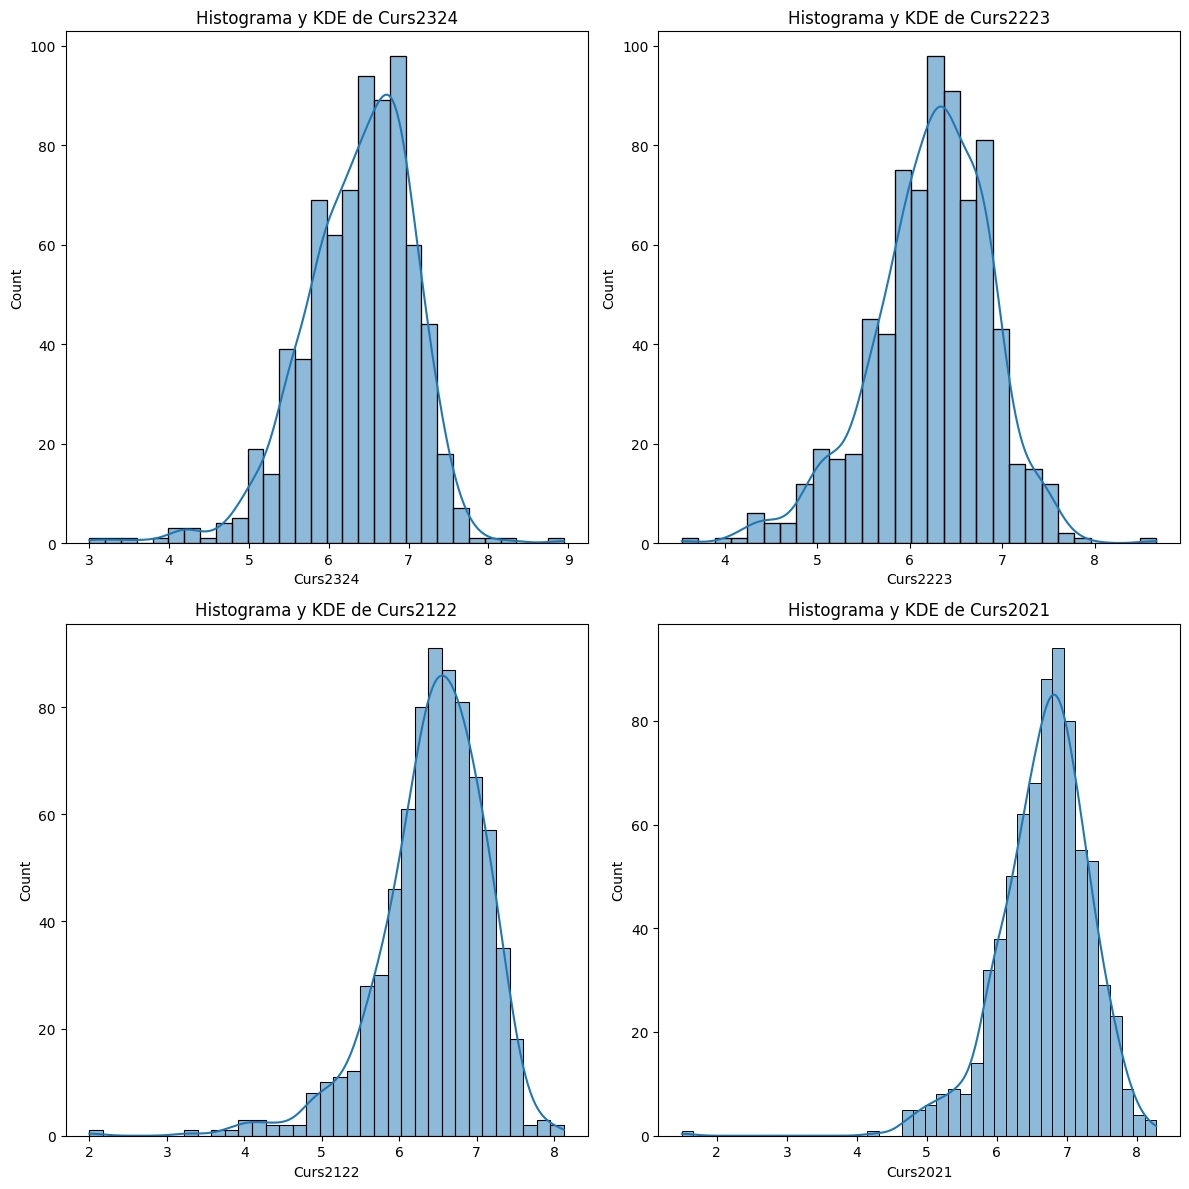

In [45]:
plot_histo_den(PAU_FE,Numericas)

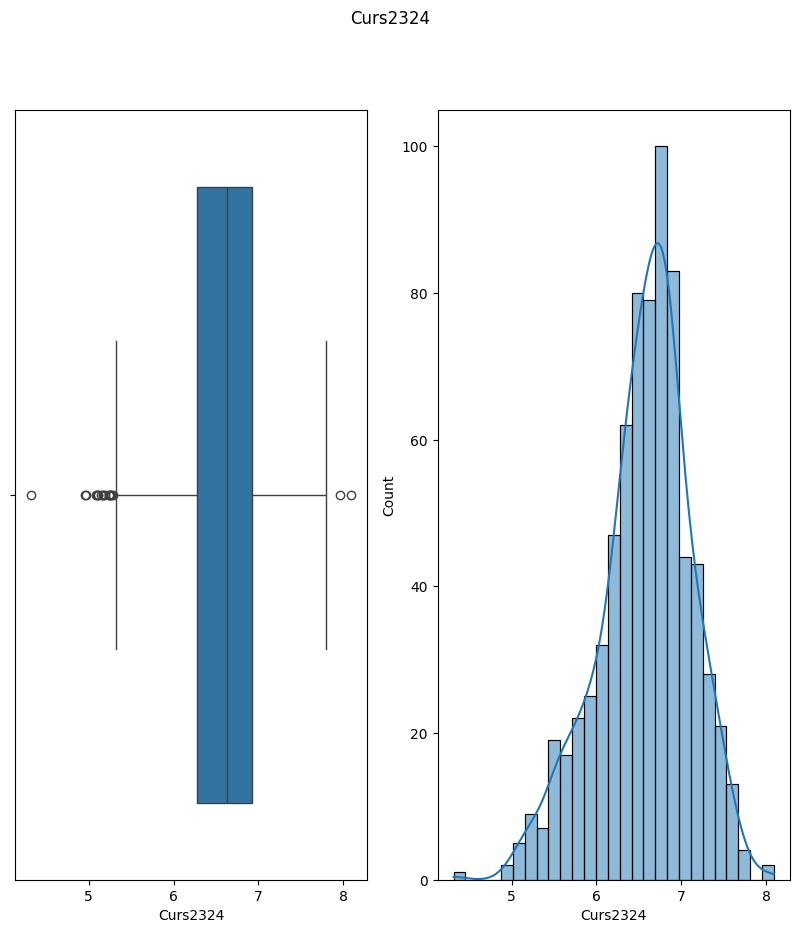

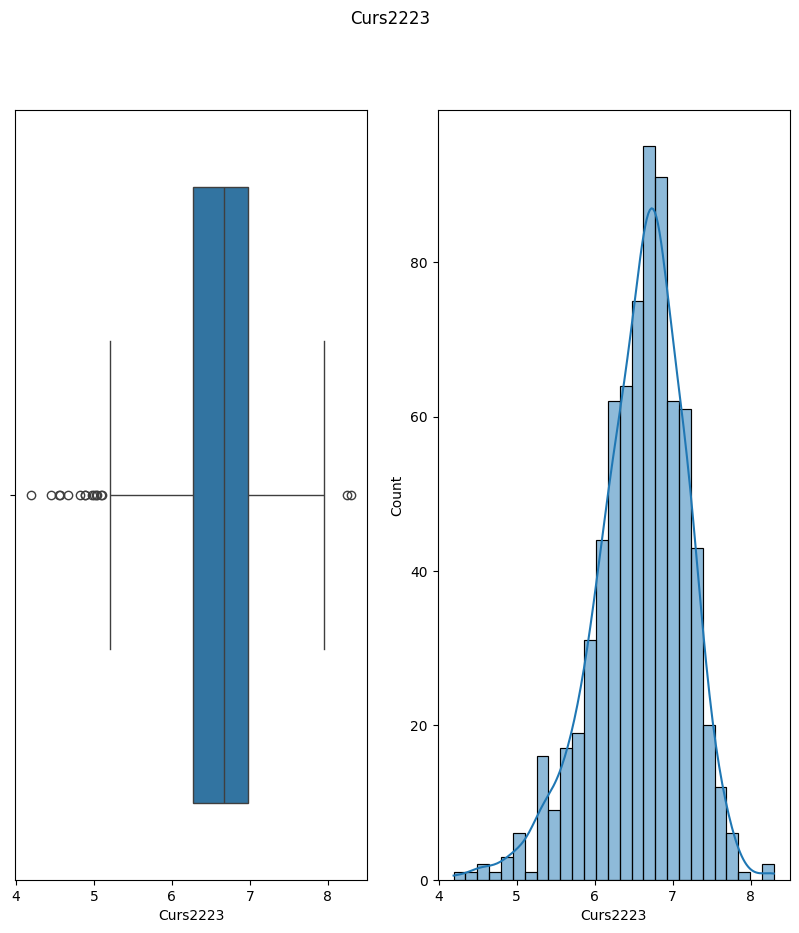

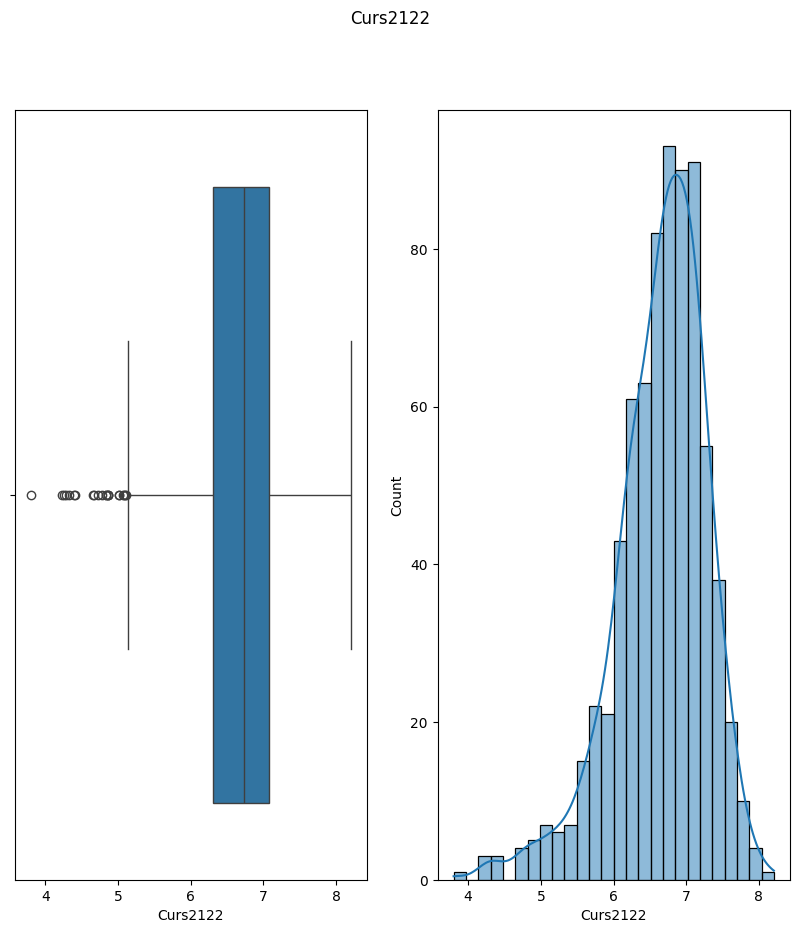

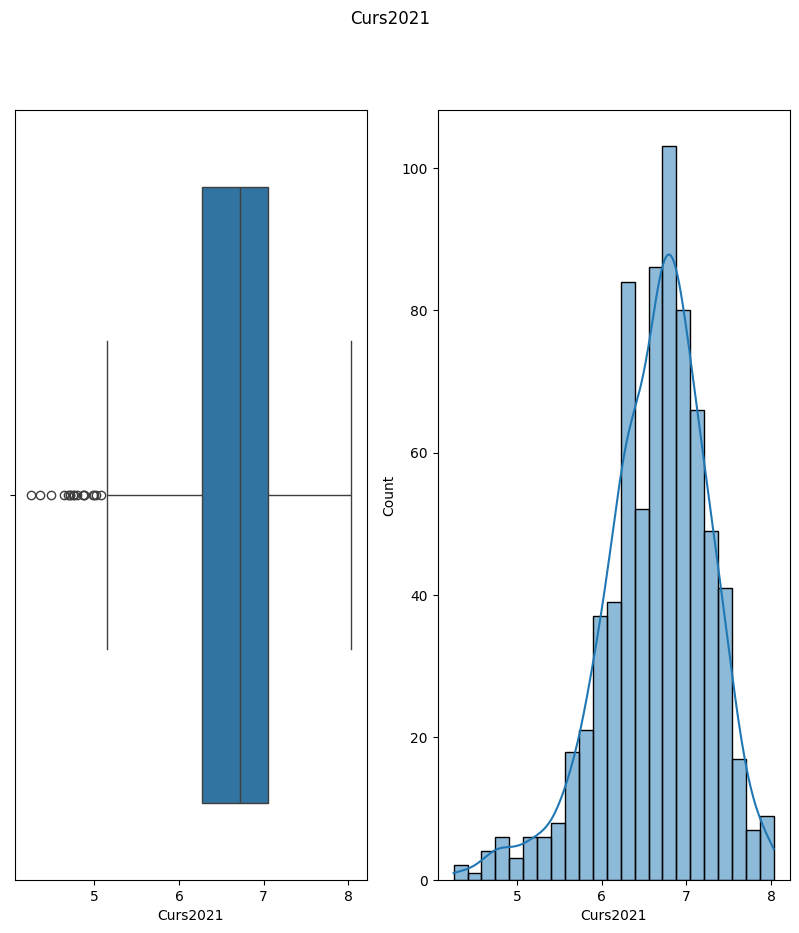

In [46]:
for columna in Numericas:
    fig, axes = plt.subplots (1,2, figsize=(10,10) )
    plt.suptitle(columna)
    sns.boxplot(x= columna, data = PAU_FG, ax=axes[0])
    sns.histplot( data = PAU_FG,x=columna, kde=True,  bins= "auto", ax=axes[1]);

# valdria la pena mirar tb los outliers de los 2 ultimos cursos

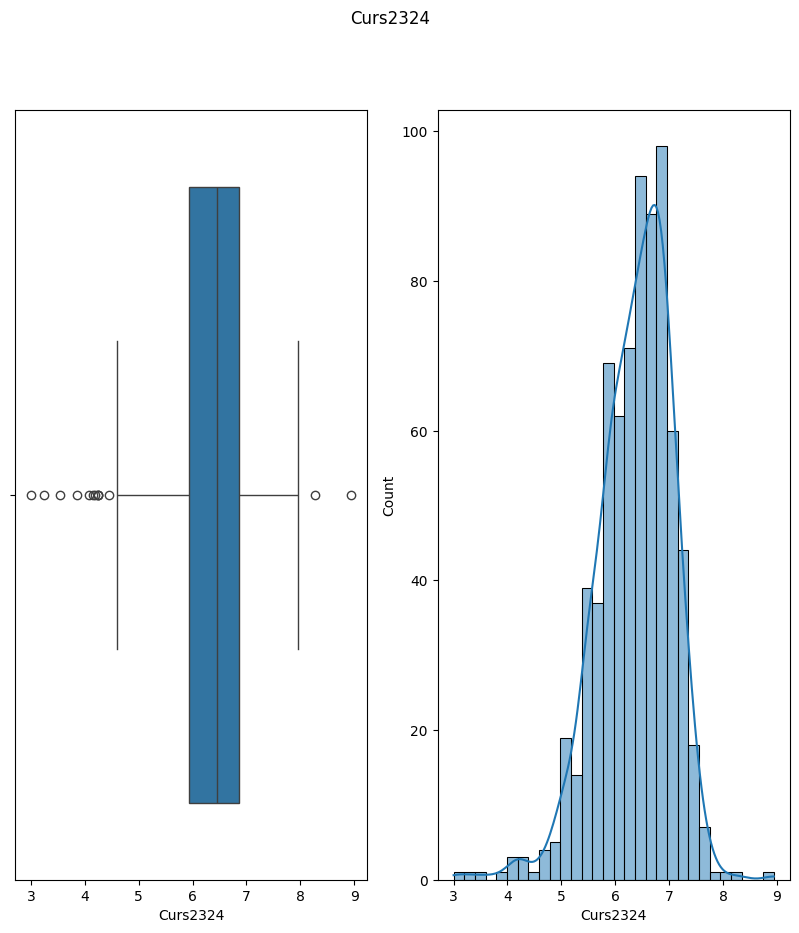

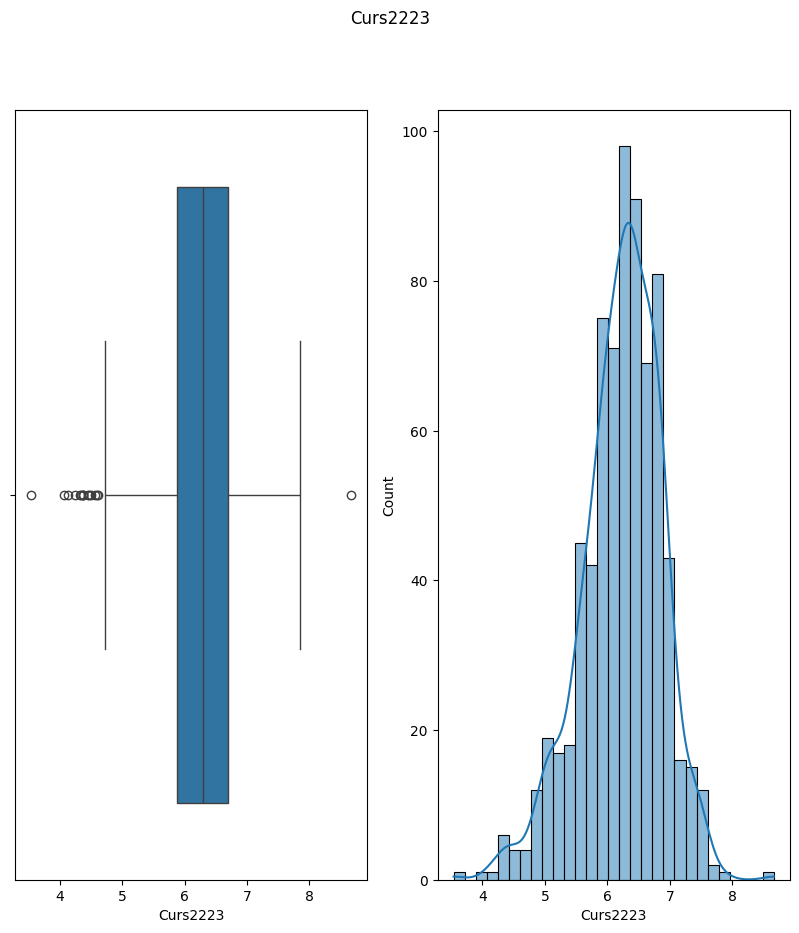

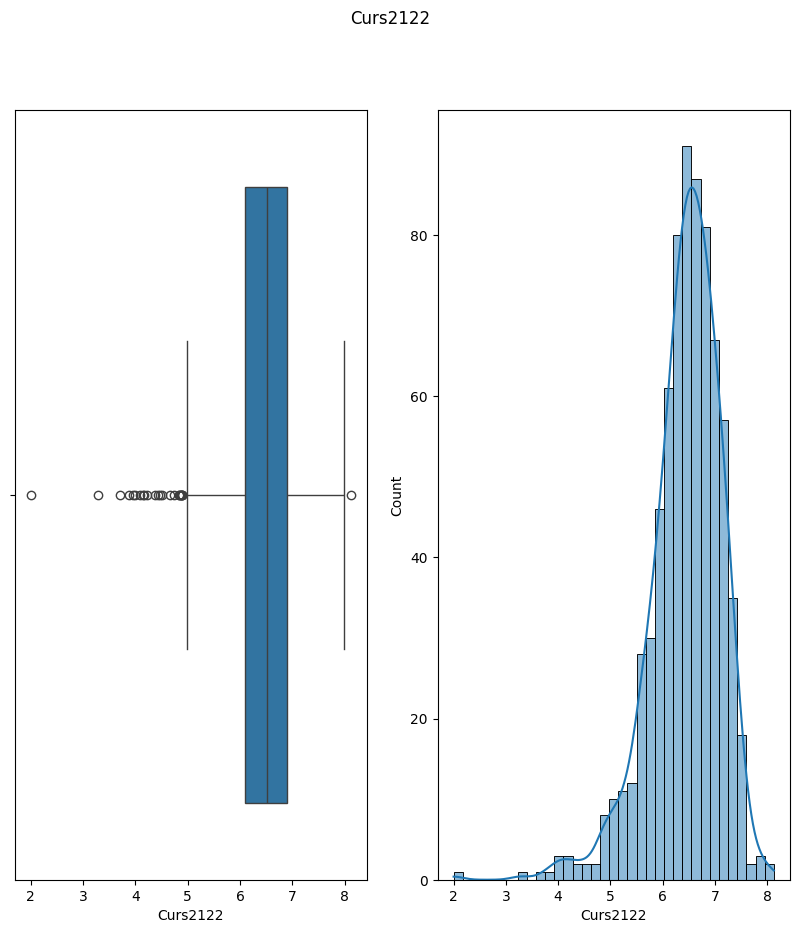

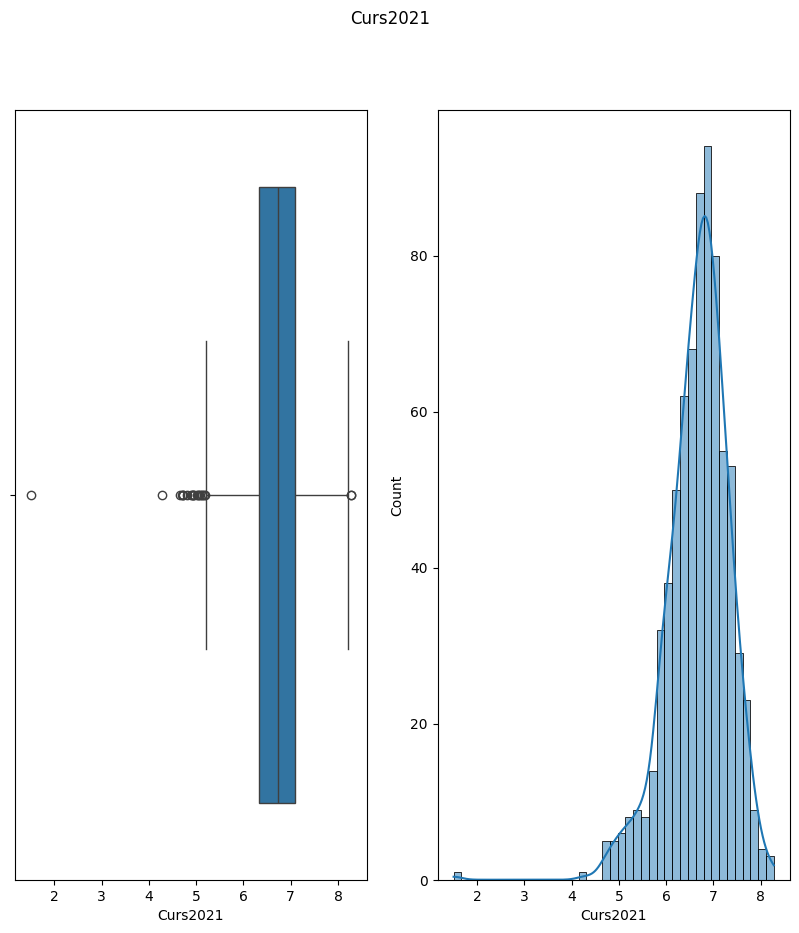

In [47]:
for columna in Numericas:
    fig, axes = plt.subplots (1,2, figsize=(10,10) )
    plt.suptitle(columna)
    sns.boxplot(x= columna, data = PAU_FE, ax=axes[0])
    sns.histplot( data = PAU_FE,x=columna, kde=True,  bins= "auto", ax=axes[1]);

# valdria la pena mirar tb los outliers de los 2 ultimos cursos

In [48]:
PAU_FG["SERVEI_TERRITORIAL"].value_counts()

SERVEI_TERRITORIAL
Consorci d'Educació de Barcelona    162
Vallès Occidental                    90
Maresme - Vallès Oriental            84
Baix Llobregat                       73
Girona                               69
Barcelonès                           57
Tarragona                            54
Penedès                              45
Lleida                               43
Catalunya Central                    43
Terres de l'Ebre                     18
Alt Pirineu i Aran                    7
Name: count, dtype: int64

In [49]:
# analisis bivariantes
PAU_FG[["Curs2324","Curs2223","Curs2122","Curs2021"]].describe()

,Curs2324,Curs2223,Curs2122,Curs2021
count,745.000000,745.000000,745.000000,745.000000
mean,6.573977,6.593503,6.651335,6.643757
std,0.542848,0.577021,0.630783,0.611921
min,4.317000,4.192000,3.800000,4.250000
25%,6.275000,6.267000,6.301000,6.276000
50%,6.634000,6.667000,6.729000,6.716000
75%,6.925000,6.976000,7.081000,7.055000
max,8.093000,8.299000,8.206000,8.033000


In [50]:
PAU_FE[["Curs2324","Curs2223","Curs2122","Curs2021"]].describe()

,Curs2324,Curs2223,Curs2122,Curs2021
count,745.000000,745.000000,745.000000,745.000000
mean,6.370474,6.233375,6.436691,6.678101
std,0.687926,0.639541,0.684478,0.650771
min,3.000000,3.538000,2.000000,1.500000
25%,5.942000,5.879000,6.095000,6.335000
50%,6.451000,6.293000,6.515000,6.737000
75%,6.862000,6.692000,6.892000,7.091000
max,8.944000,8.667000,8.125000,8.279000


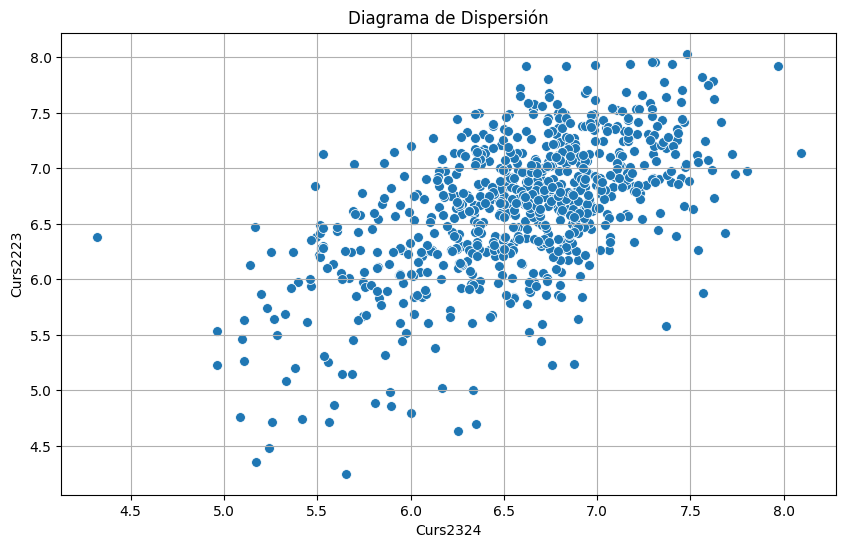

In [51]:
# correlacion bivariantes (jugamos con los cursos, y los 2 dataset .... )
plt.figure(figsize=(10, 6))
sns.scatterplot(data=PAU_FG, x="Curs2324", y="Curs2021", s=50)
plt.title('Diagrama de Dispersión')
plt.xlabel("Curs2324")
plt.ylabel("Curs2223")
plt.grid(True)
plt.show()

In [52]:
#coeficiente de correlacion
PAU_FG[["Curs2324","Curs2223"]].corr()

,Curs2324,Curs2223
Curs2324,1.0000,0.6325
Curs2223,0.6325,1.0000


In [53]:
PAU_FE[["Curs2324","Curs2122"]].corr()

,Curs2324,Curs2122
Curs2324,1.000000,0.454466
Curs2122,0.454466,1.000000


In [54]:
from scipy.stats import pearsonr
pearsonr(PAU_FG["Curs2324"], PAU_FG["Curs2223"], alternative= "less")

PearsonRResult(statistic=np.float64(0.6324996739697852), pvalue=np.float64(1.0))

In [55]:
def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()


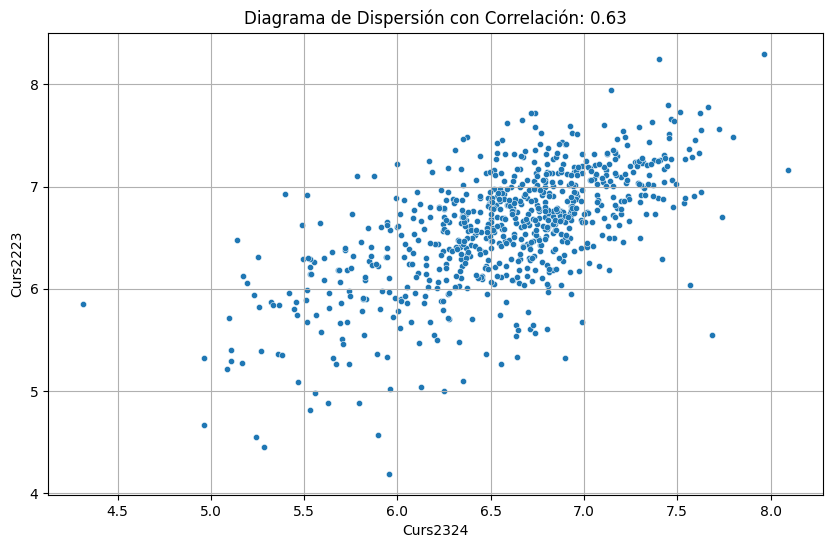

In [56]:
grafico_dispersion_con_correlacion(PAU_FG,"Curs2324","Curs2223", 20, mostrar_correlacion = True)

In [57]:
# numerica con categorica
def plot_grouped_histograms(df, cat_col, num_col, group_size):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat))
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

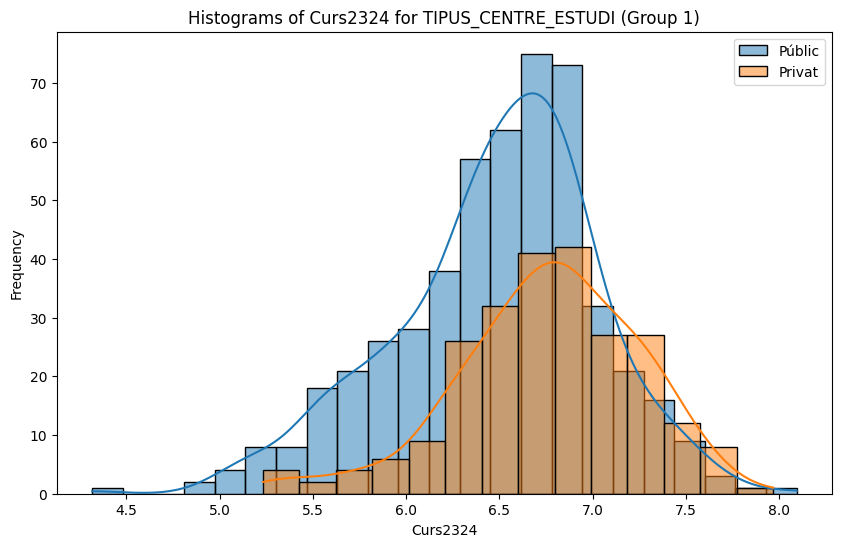

In [58]:
plot_grouped_histograms(PAU_FG,cat_col="TIPUS_CENTRE_ESTUDI", num_col="Curs2324", group_size=2)

In [59]:
from scipy.stats import mannwhitneyu

In [60]:
for col in Numericas:
    grupo_a = PAU_FG.loc[PAU_FG.TIPUS_CENTRE_ESTUDI == "Privat"][col]
    grupo_b = PAU_FG.loc[PAU_FG.TIPUS_CENTRE_ESTUDI == "Públic"][col]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print(f"Estadístico U {col} de PAU_FG:", u_stat)
    print(f"Valor p - {col} de PAU_FG:", p_valor)

Estadístico U Curs2324 de PAU_FG: 79231.0
Valor p - Curs2324 de PAU_FG: 1.6751792596449952e-11
Estadístico U Curs2223 de PAU_FG: 81305.0
Valor p - Curs2223 de PAU_FG: 7.067654868457277e-14
Estadístico U Curs2122 de PAU_FG: 84206.0
Valor p - Curs2122 de PAU_FG: 1.3155302352784715e-17
Estadístico U Curs2021 de PAU_FG: 83922.0
Valor p - Curs2021 de PAU_FG: 3.201485304281978e-17


In [61]:
for col in Numericas:
    grupo_a = PAU_FE.loc[PAU_FE.TIPUS_CENTRE_ESTUDI == "Privat"][col]
    grupo_b = PAU_FE.loc[PAU_FE.TIPUS_CENTRE_ESTUDI == "Públic"][col]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print(f"Estadístico U {col} de PAU_FE:", u_stat)
    print(f"Valor p - {col} de PAU_FE:", p_valor)


# en resultado del P.value podemos confirmar que hay confianza estadistica para rechazar la hipotesis nula de independencia de las varaibles y decir por lo tanto que si que extite relacion

Estadístico U Curs2324 de PAU_FE: 72736.0
Valor p - Curs2324 de PAU_FE: 1.2525558770355218e-05
Estadístico U Curs2223 de PAU_FE: 78548.5
Valor p - Curs2223 de PAU_FE: 8.963045922175454e-11
Estadístico U Curs2122 de PAU_FE: 80118.5
Valor p - Curs2122 de PAU_FE: 1.7282048537625258e-12
Estadístico U Curs2021 de PAU_FE: 80775.0
Valor p - Curs2021 de PAU_FE: 3.01478984382358e-13


In [62]:
import scipy.stats as stats
for col in Numericas:
    grupo_a = PAU_FE.loc[PAU_FE.TIPUS_CENTRE_ESTUDI == "Privat"][col]
    grupo_b = PAU_FE.loc[PAU_FE.TIPUS_CENTRE_ESTUDI == "Públic"][col]
    t_stat,p_valor= stats.ttest_ind(grupo_a,grupo_b)
    nivel_confianza=0.05
    if p_valor < nivel_confianza:
        print("Hay diferencia significativa entre los grupos")
    else:
        print("No hay diferencia significativa entre los grupos")

Hay diferencia significativa entre los grupos
Hay diferencia significativa entre los grupos
Hay diferencia significativa entre los grupos
Hay diferencia significativa entre los grupos


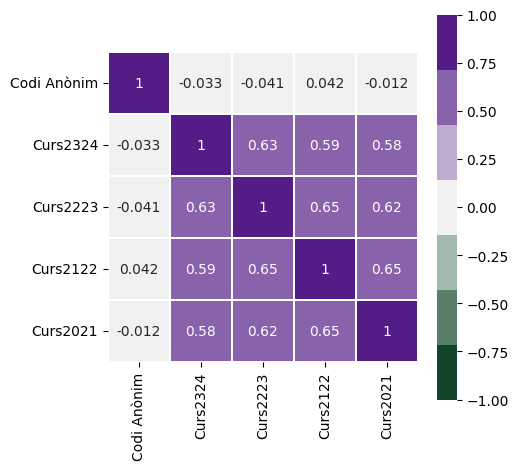

In [63]:
# multivariantes 

matriz_corr = PAU_FG.corr(numeric_only= True)
plt.figure(figsize=(5,5))
sns.heatmap(matriz_corr,
            vmin=-1,  #extremos de colores
            vmax=1,  #extremos de colores
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),  # paleta de colores
            square=True, #para que sea cuadrada
            linewidths=.1,
            annot=True); #para que ponga los numeros

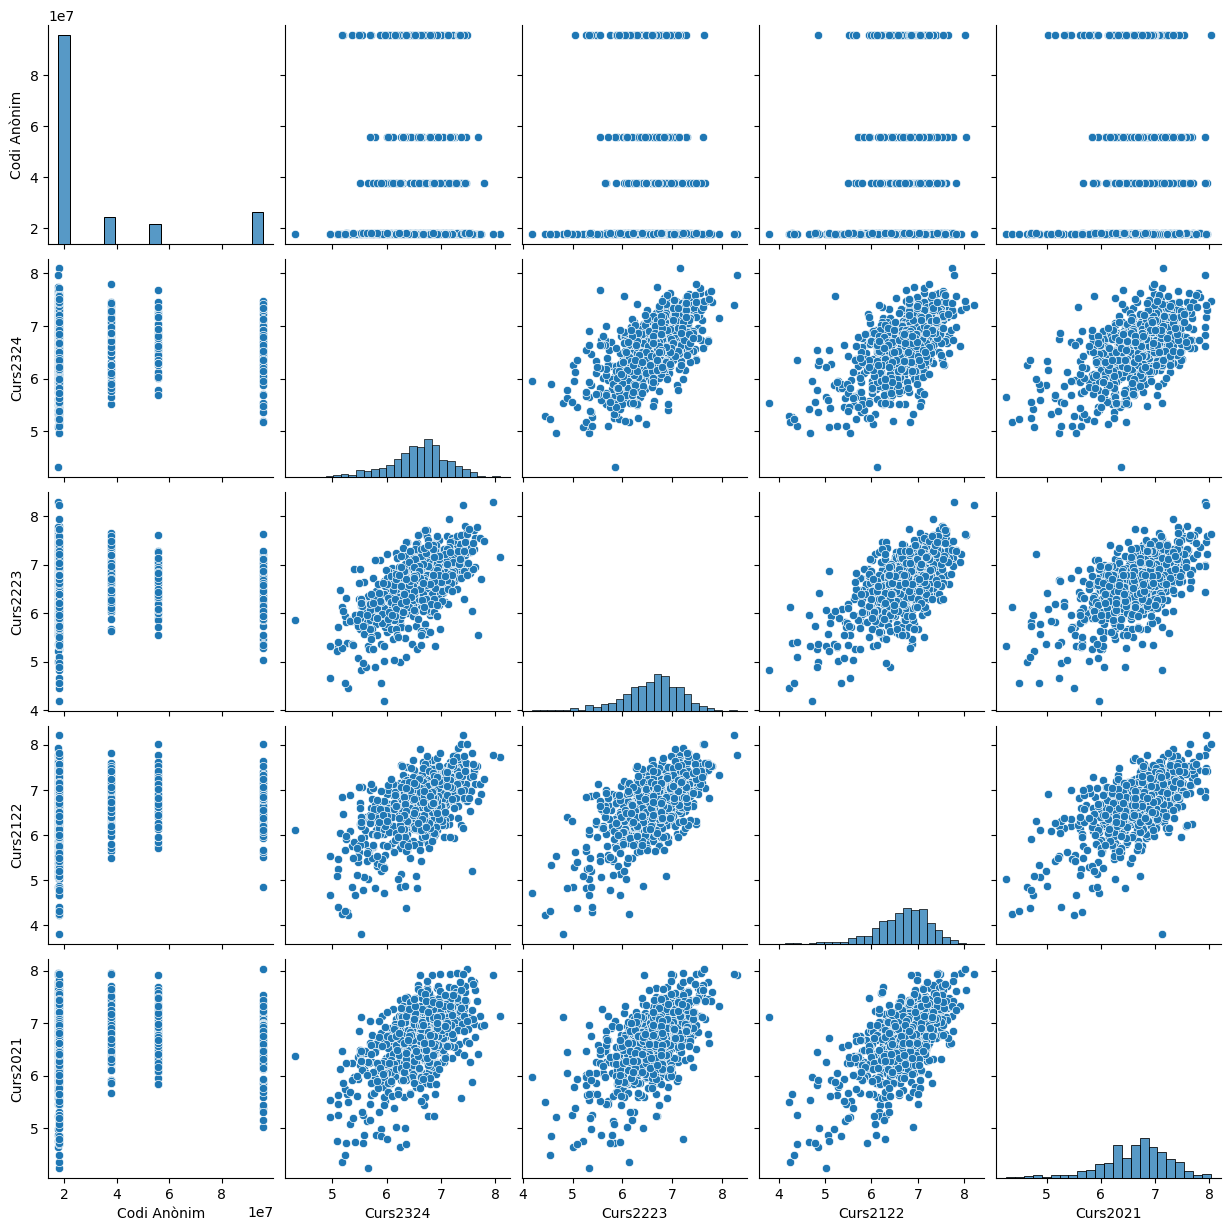

In [64]:
sns.pairplot(PAU_FG);

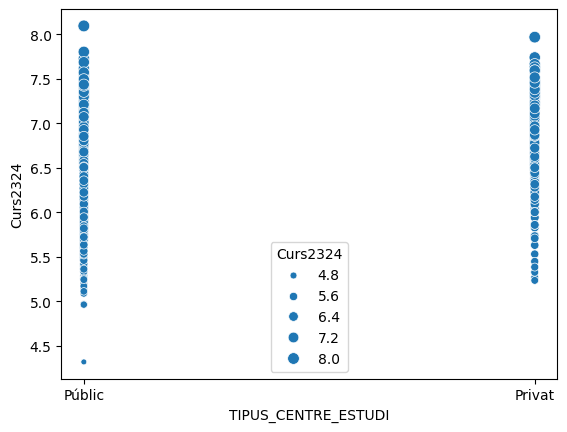

In [65]:
sns.scatterplot(x="TIPUS_CENTRE_ESTUDI", y= "Curs2324", size = PAU_FG["Curs2324"], data = PAU_FG);

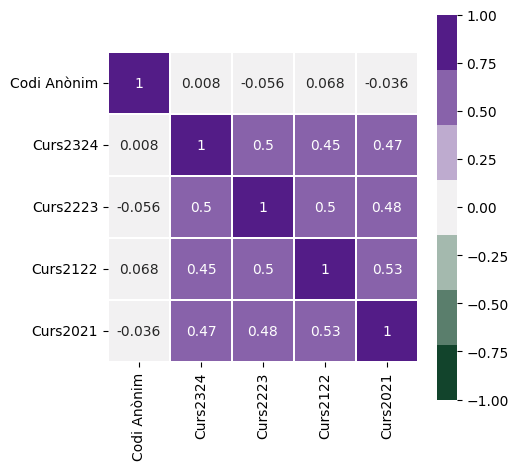

In [66]:
matriz_corr = PAU_FE.corr(numeric_only= True)
plt.figure(figsize=(5,5))
sns.heatmap(matriz_corr,
            vmin=-1,  #extremos de colores
            vmax=1,  #extremos de colores
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),  # paleta de colores
            square=True, #para que sea cuadrada
            linewidths=.1,
            annot=True); #para que ponga los numeros

plt.savefig("./Imagenes/Creadas/sorprendente_scorepboxplot4.png")

In [67]:
PAU_FG.Curs2324.describe()

count    745.000000
mean       6.573977
std        0.542848
min        4.317000
25%        6.275000
50%        6.634000
75%        6.925000
max        8.093000
Name: Curs2324, dtype: float64

In [68]:
# del mismo modo que analizamos el otro data set
# creacion de nueva columna "aprobacion"
PAU_FG["aprobacion"] = "insatisfactorio"
PAU_FG.loc[PAU_FG["Curs2324"] > 6.275, "aprobacion"] = "satisfactorio"
PAU_FG.loc[PAU_FG["Curs2324"] > 6.925, "aprobacion"] = "notable"
PAU_FG["aprobacion"].value_counts()


aprobacion
satisfactorio      372
insatisfactorio    187
notable            186
Name: count, dtype: int64

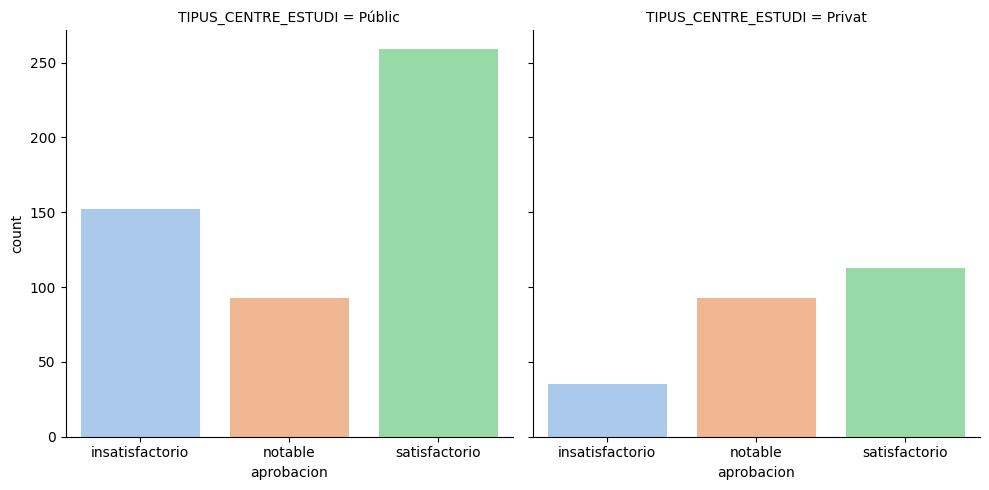

In [69]:
centros_resultados = sns.catplot(x= "aprobacion", col = "TIPUS_CENTRE_ESTUDI", data = PAU_FG, kind = "count", hue = "aprobacion", palette = "pastel");
centros_resultados.savefig("./Imagenes/Creadas/centros_resultados.png")
#el mismo numero de notable en los 2 pero solo 30% de privado en total

In [70]:
privado = PAU_FG.loc[PAU_FG["TIPUS_CENTRE_ESTUDI"] == "Privat"]
publico = PAU_FG.loc[PAU_FG["TIPUS_CENTRE_ESTUDI"] == "Públic"]

privado

,SERVEI_TERRITORIAL,Codi Anònim,TIPUS_CENTRE_ESTUDI,Curs2324,Curs2223,Curs2122,Curs2021,aprobacion
7,Baix Llobregat,17853332,Privat,6.835,7.006,6.979,7.923,satisfactorio
8,Baix Llobregat,17855130,Privat,6.986,6.670,6.601,7.407,notable
9,Baix Llobregat,17855191,Privat,6.806,6.601,6.348,6.822,satisfactorio
12,Baix Llobregat,17856040,Privat,6.927,6.745,6.719,6.676,notable
13,Baix Llobregat,17856058,Privat,6.896,7.414,6.701,6.172,satisfactorio
...,...,...,...,...,...,...,...,...
704,Vallès Occidental,17916145,Privat,6.925,7.588,7.296,7.118,satisfactorio
734,Vallès Occidental,17944105,Privat,7.455,7.471,7.420,7.441,notable
739,Vallès Occidental,17971996,Privat,6.000,7.217,6.300,4.800,insatisfactorio
742,Vallès Occidental,17984056,Privat,5.383,5.350,5.500,5.200,insatisfactorio


In [71]:
(PAU_FG["aprobacion"].value_counts()/len(PAU_FG))*100

aprobacion
satisfactorio      49.932886
insatisfactorio    25.100671
notable            24.966443
Name: count, dtype: float64

In [72]:
#aprobacion media de los ultimos años
PAU_FG["aprobacion_media"] = (PAU_FG["Curs2324"] + PAU_FG["Curs2223"]+ PAU_FG["Curs2122"]+ PAU_FG["Curs2021"])/4
PAU_FG

,SERVEI_TERRITORIAL,Codi Anònim,TIPUS_CENTRE_ESTUDI,Curs2324,Curs2223,Curs2122,Curs2021,aprobacion,aprobacion_media
0,Alt Pirineu i Aran,37875315,Públic,5.517,5.672000,6.715000,6.494000,insatisfactorio,6.099500
1,Alt Pirineu i Aran,55689276,Públic,7.048,6.419000,7.406000,7.360000,notable,7.058250
2,Alt Pirineu i Aran,55693082,Públic,6.017,5.899000,6.402000,5.839000,insatisfactorio,6.039250
3,Alt Pirineu i Aran,55693083,Públic,7.155,6.900000,6.248000,7.691000,notable,6.998500
4,Alt Pirineu i Aran,55693131,Públic,6.621,6.786000,6.866000,6.877000,satisfactorio,6.787500
...,...,...,...,...,...,...,...,...,...
740,Vallès Occidental,17976421,Públic,6.851,6.781000,6.709000,6.405000,satisfactorio,6.686500
741,Vallès Occidental,17979279,Públic,5.633,5.959000,5.593000,6.008000,insatisfactorio,5.798250
742,Vallès Occidental,17984056,Privat,5.383,5.350000,5.500000,5.200000,insatisfactorio,5.358250
743,Vallès Occidental,17987049,Privat,7.514,7.733000,6.813000,6.633000,notable,7.173250


In [73]:
PAU_FG["aprobacion_media"] = "insatisfactorio"
PAU_FG.loc[PAU_FG["Curs2324"] > 6.275, "aprobacion_media"] = "satisfactorio"
PAU_FG.loc[PAU_FG["Curs2324"] > 6.925, "aprobacion_media"] = "notable"
PAU_FG["aprobacion_media"].value_counts()


aprobacion_media
satisfactorio      372
insatisfactorio    187
notable            186
Name: count, dtype: int64

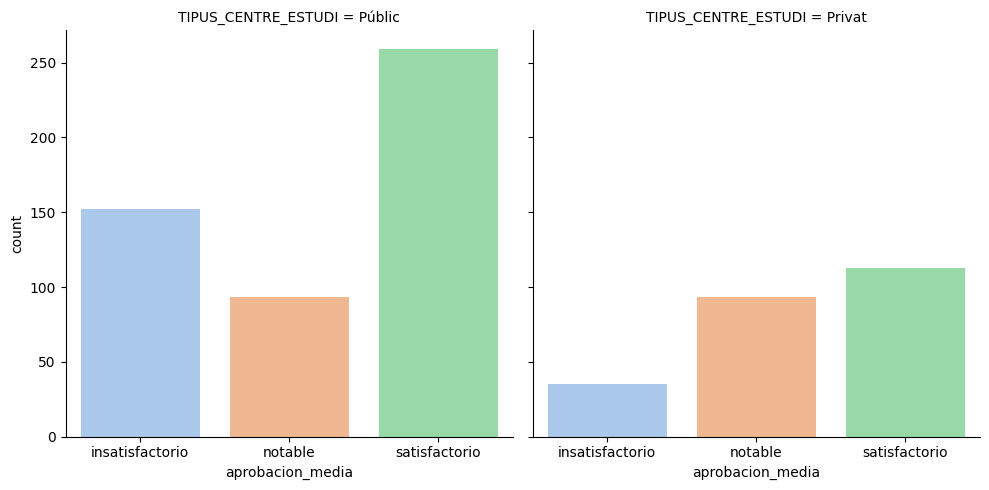

In [74]:
centros_resultados_medios= sns.catplot(x= "aprobacion_media", col = "TIPUS_CENTRE_ESTUDI", data = PAU_FG, kind = "count", hue="aprobacion_media", palette = "pastel" );
centros_resultados_medios.savefig("./Imagenes/Creadas/centros_resultados_medios.png")

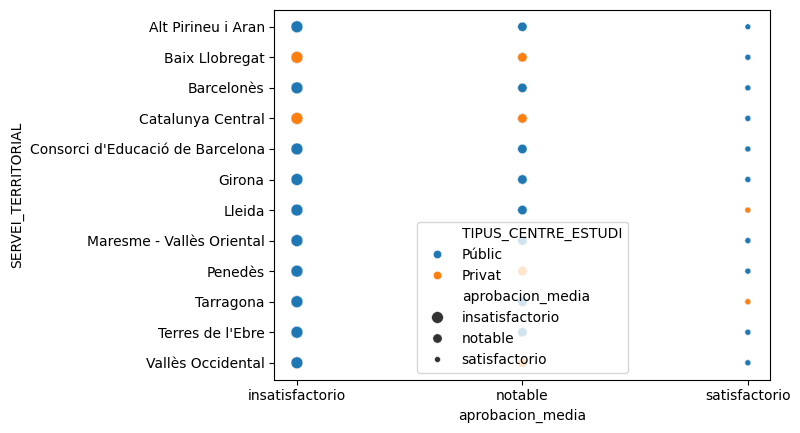

In [75]:
# por comarcas
sns.scatterplot(x="aprobacion_media", y= "SERVEI_TERRITORIAL", size = PAU_FG["aprobacion_media"], data = PAU_FG, hue= "TIPUS_CENTRE_ESTUDI");


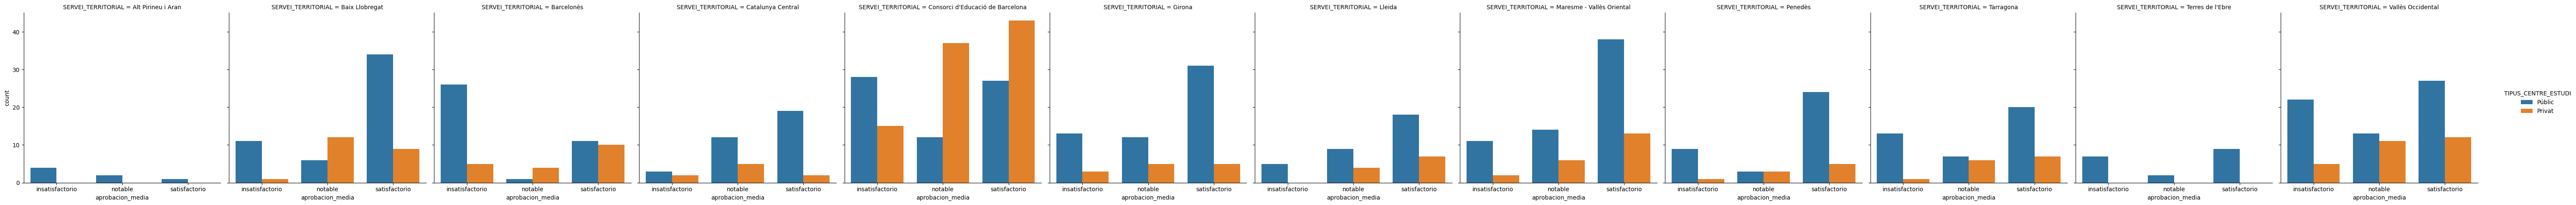

In [76]:
sns.catplot(x= "aprobacion_media", col = "SERVEI_TERRITORIAL", data = PAU_FG, hue = "TIPUS_CENTRE_ESTUDI", kind = "count");

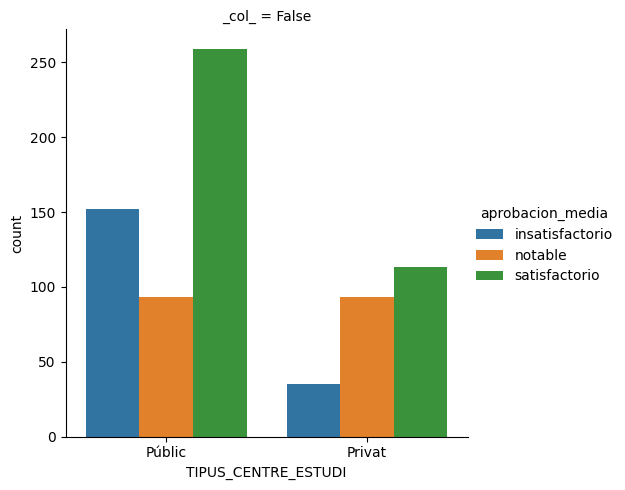

In [77]:
sns.catplot(x="TIPUS_CENTRE_ESTUDI", col = ("SERVEI_TERRITORIAL"=="Barcelonès") , data = PAU_FG, hue = "aprobacion_media" , kind = "count");

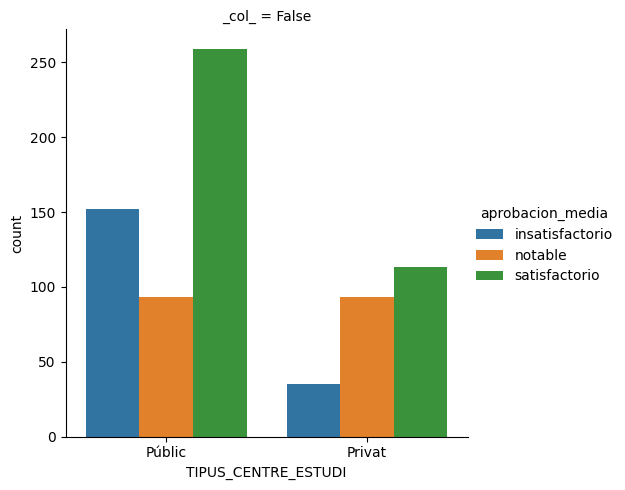

In [78]:
sns.catplot(x="TIPUS_CENTRE_ESTUDI", col = ("SERVEI_TERRITORIAL"=="Maresme - Vallès Oriental") , data = PAU_FG, hue = "aprobacion_media" , kind = "count");

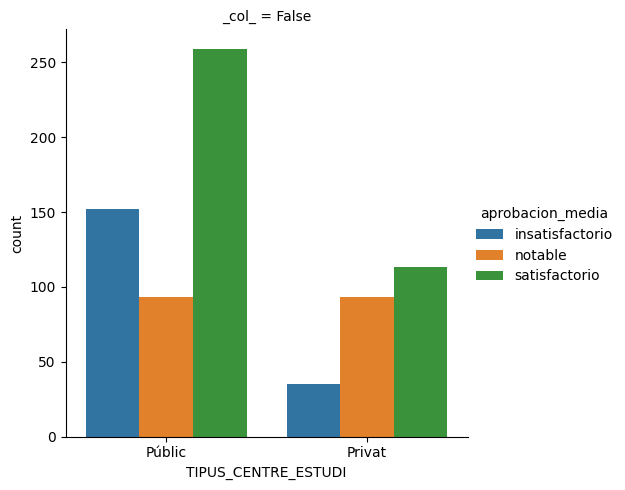

In [79]:
sns.catplot(x="TIPUS_CENTRE_ESTUDI", col = ("SERVEI_TERRITORIAL"=="Consorci d'Educació de Barcelona") , data = PAU_FG, hue = "aprobacion_media" , kind = "count");

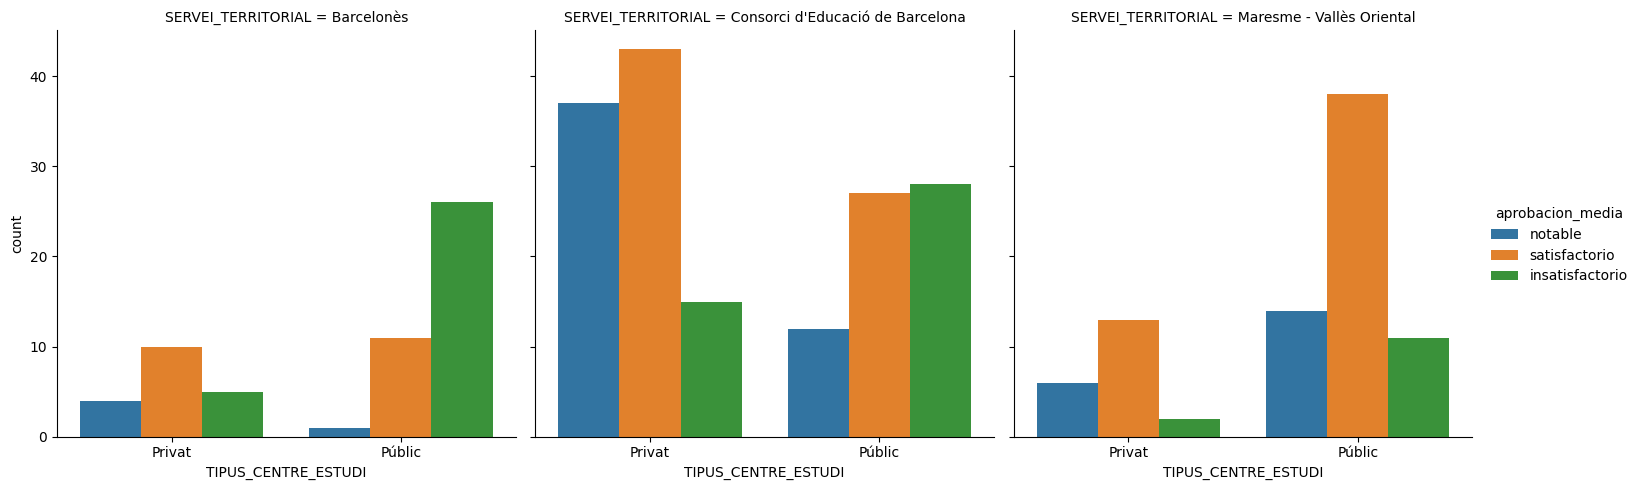

In [80]:
filtrado = PAU_FG.loc[PAU_FG.SERVEI_TERRITORIAL.isin(["Barcelonès","Maresme - Vallès Oriental","Consorci d'Educació de Barcelona"])]
filtrado
sns.catplot(x="TIPUS_CENTRE_ESTUDI", col = "SERVEI_TERRITORIAL" , data = filtrado, hue = "aprobacion_media" , kind = "count");

In [81]:
PAU_FG.SERVEI_TERRITORIAL.value_counts()

SERVEI_TERRITORIAL
Consorci d'Educació de Barcelona    162
Vallès Occidental                    90
Maresme - Vallès Oriental            84
Baix Llobregat                       73
Girona                               69
Barcelonès                           57
Tarragona                            54
Penedès                              45
Lleida                               43
Catalunya Central                    43
Terres de l'Ebre                     18
Alt Pirineu i Aran                    7
Name: count, dtype: int64

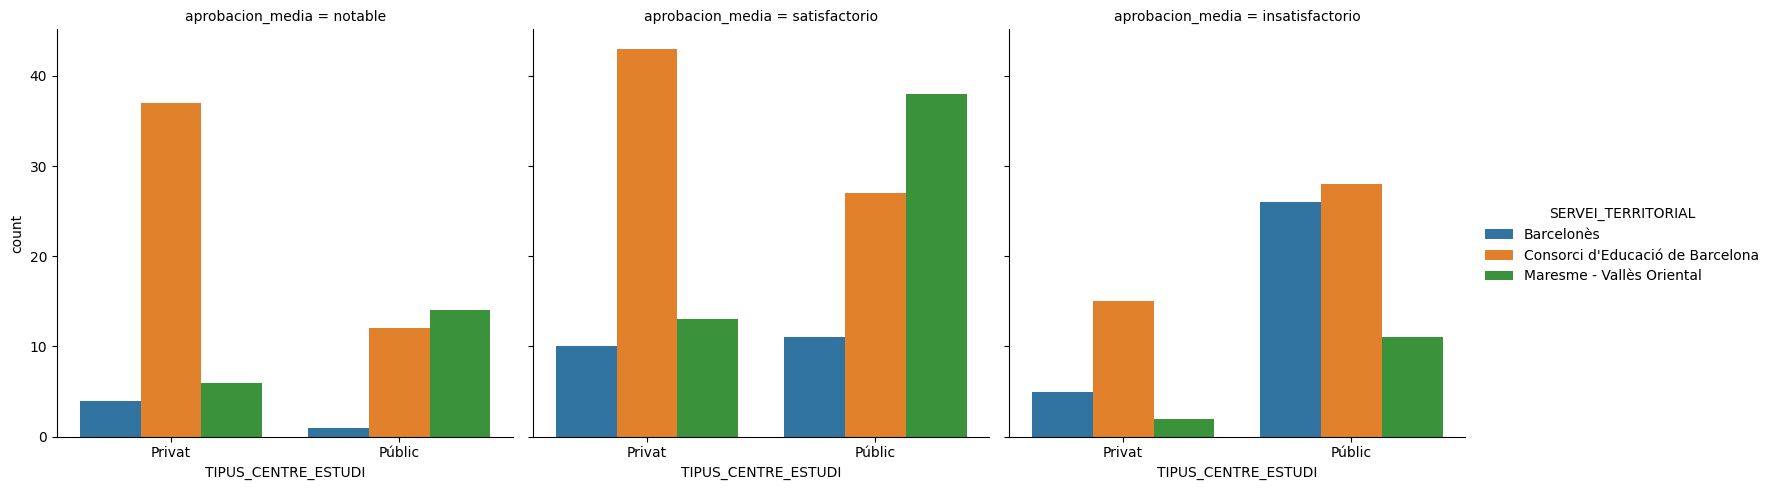

In [82]:
sns.catplot(x= "TIPUS_CENTRE_ESTUDI", col ="aprobacion_media" , data = filtrado, hue = "SERVEI_TERRITORIAL", kind = "count");


In [83]:
#tabla de contingencia 
tabla_contingencia_global = pd.crosstab(PAU_FG["TIPUS_CENTRE_ESTUDI"],PAU_FG["aprobacion_media"]).T
tabla_contingencia_global["privado"] = (tabla_contingencia_global["Privat"]/(tabla_contingencia_global["Privat"] + tabla_contingencia_global["Públic"])).round(3) * 100
tabla_contingencia_global["publico"] = (tabla_contingencia_global["Públic"]/(tabla_contingencia_global["Privat"] + tabla_contingencia_global["Públic"])).round(3) * 100
tabla_contingencia_global


TIPUS_CENTRE_ESTUDI,Privat,Públic,privado,publico
aprobacion_media,,,,
insatisfactorio,35,152,18.7,81.3
notable,93,93,50.0,50.0
satisfactorio,113,259,30.4,69.6


In [84]:
# sobre las comarcas que me interesan 
tabla_contingencia_local = pd.crosstab(filtrado["TIPUS_CENTRE_ESTUDI"],filtrado["aprobacion_media"]).T
tabla_contingencia_local["privado"] = (tabla_contingencia_local["Privat"]/(tabla_contingencia_local["Privat"] + tabla_contingencia_local["Públic"])).round(3) * 100
tabla_contingencia_local["publico"] = (tabla_contingencia_local["Públic"]/(tabla_contingencia_local["Privat"] + tabla_contingencia_local["Públic"])).round(3) * 100
tabla_contingencia_local

TIPUS_CENTRE_ESTUDI,Privat,Públic,privado,publico
aprobacion_media,,,,
insatisfactorio,22,65,25.3,74.7
notable,47,27,63.5,36.5
satisfactorio,66,76,46.5,53.5


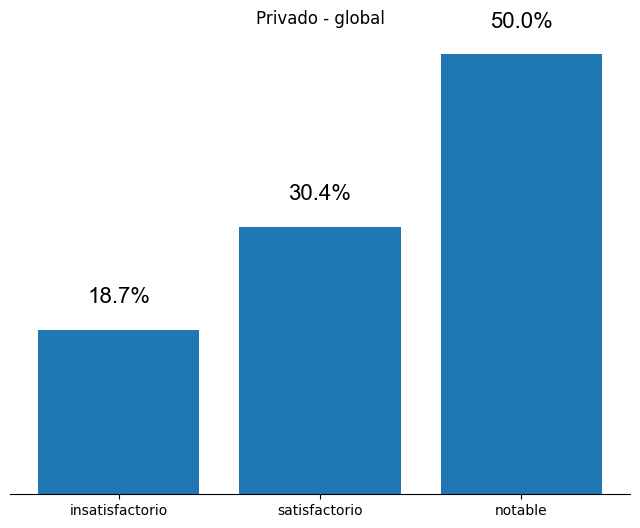

In [85]:
fig,ax = plt.subplots(figsize = (8,6))
ax.bar(tabla_contingencia_global.sort_values("privado").index.to_list(), height = tabla_contingencia_global.sort_values("privado").privado.to_list())
ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["satisfactorio","insatisfactorio","notable"]:
    valor = tabla_contingencia_global.loc[categoria, "privado"]
    ax.text(categoria, valor+ 3, f"{round(valor,2)}%", ha = "center", fontdict = dict(family= "Arial", size = 16))
    ax.set_title("Privado - global")

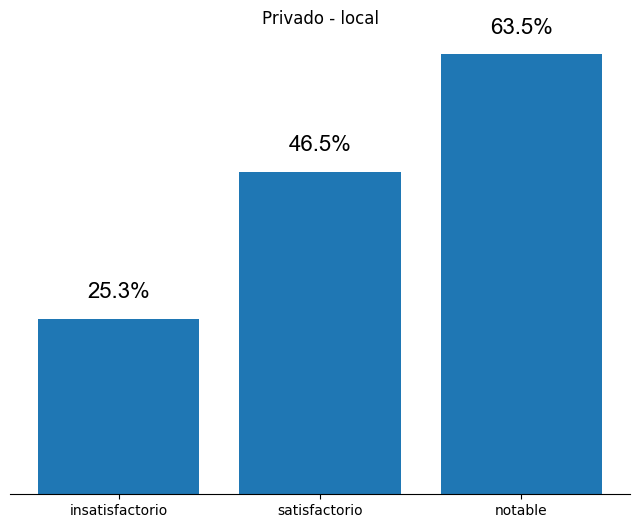

In [86]:
fig,ax = plt.subplots(figsize = (8,6))
ax.bar(tabla_contingencia_local.sort_values("privado").index.to_list(), height = tabla_contingencia_local.sort_values("privado").privado.to_list())
ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["satisfactorio","insatisfactorio","notable"]:
    valor = tabla_contingencia_local.loc[categoria, "privado"]
    ax.text(categoria, valor+ 3, f"{round(valor,2)}%", ha = "center", fontdict = dict(family= "Arial", size = 16))
    ax.set_title("Privado - local")

In [87]:
def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()



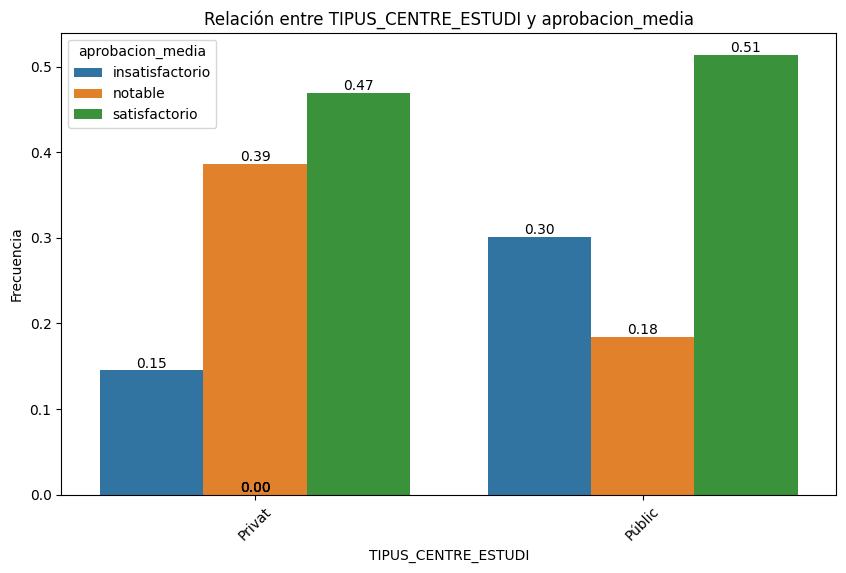

In [88]:
plot_categorical_relationship_fin(PAU_FG, "TIPUS_CENTRE_ESTUDI","aprobacion_media", relative_freq = True, show_values = True)

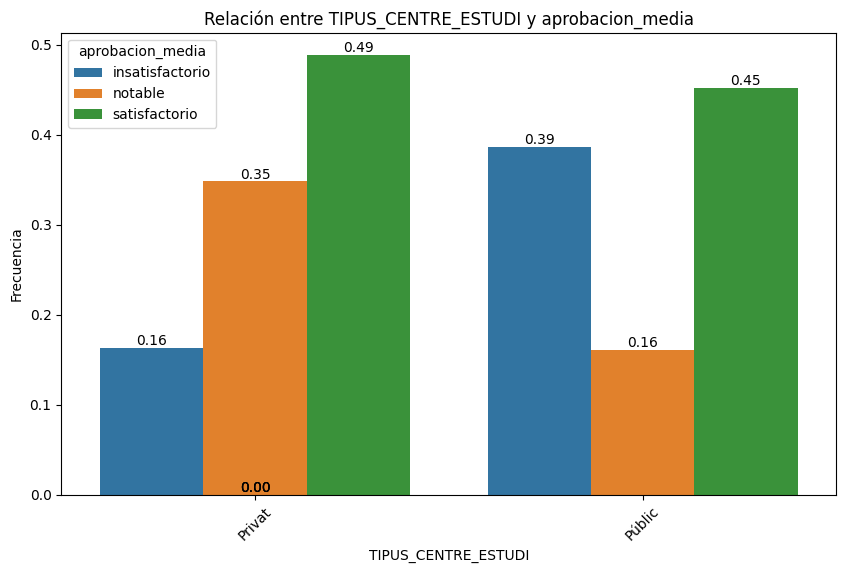

In [92]:
local=plot_categorical_relationship_fin(filtrado, "TIPUS_CENTRE_ESTUDI","aprobacion_media", relative_freq = True, show_values = True)

